<a href="https://colab.research.google.com/github/princevalerie/ID-X_Partners/blob/main/Prince_Valerie_Da'matha_Jr_VIX_IDX_Partners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Preparation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/rakamin_idx/loan_data_2007_2014.csv")
df.head(3)

<ipython-input-6-2e822391b4a0>:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/content/drive/MyDrive/rakamin_idx/loan_data_2007_2014.csv")


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.0,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [ ]:
df.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,466256.000000,215934.000000,62638.000000,466256.000000,466256.000000,4.662850e+05,465945.000000,466256.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466140.000000,98974.000000,466285.0,0.0,0.0,0.0,466256.000000,3.960090e+05,3.960090e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,0.284678,0.804745,34.104430,74.306012,11.187069,0.160564,1.623020e+04,56.176947,25.064430,4410.062342,4408.452258,11540.686220,11469.892747,8866.014657,2588.677225,0.650129,85.344211,8.961534,3123.913796,0.009085,42.852547,1.0,NaN,NaN,NaN,0.004002,1.919135e+02,1.388017e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,0.797365,1.091598,21.778487,30.357653,4.987526,0.510863,2.067625e+04,23.732628,11.600141,6355.078769,6353.198001,8265.627112,8254.157579,7031.687997,2483.809661,5.265730,552.216084,85.491437,5554.737393,0.108648,21.662591,0.0,NaN,NaN,NaN,0.068637,1.463021e+04,1.521147e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,0.000000,16.000000,53.000000,8.000000,0.000000,6.413000e+03,39.200000,17.000000,0.000000,0.000000,5552.125349,5499.250000,3708.560000,957.280000,0.000000,0.000000,0.000000,312.620000,0.000000,26.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.861800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,0.000000,31.000000,76.000000,10.000000,0.000000,1.176400e+04,57.600000,23.000000,441.470000,441.380000,9419.250943,9355.430000,6817.760000,1818.880000,0.000000,0.000000,0.000000,545.960000,0.000000,42.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,8.153900e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,0.000000,1.000000,49.000000,102.000000,14.000000,0.000000,2.033300e+04,74.700000,32.000000,7341.650000,7338.390000,15308.158460,15231.310000,12000.000000,3304.530000,0.000000,0.000000,0.000000,3187.510000,0.000000,59.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.089530e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

Menentukan Kolom Target

In [ ]:
df['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

<ipython-input-10-a28bbc393612>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loan_status_counts.values, y=loan_status_counts.index, palette='viridis')


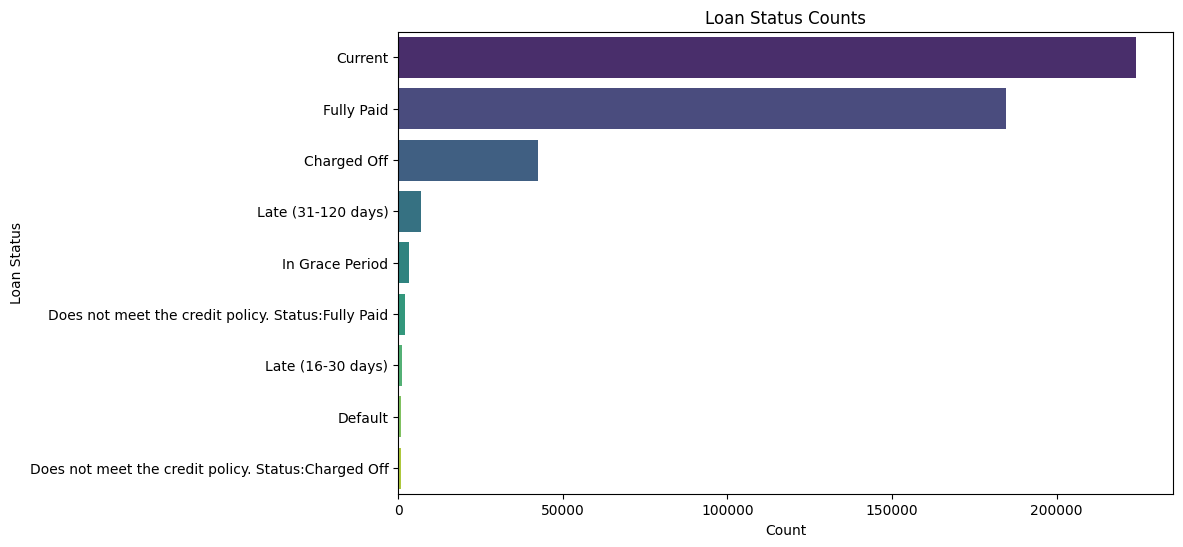

In [ ]:
loan_status_counts = df['loan_status'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=loan_status_counts.values, y=loan_status_counts.index, palette='viridis')
plt.title('Loan Status Counts')
plt.xlabel('Count')
plt.ylabel('Loan Status')
plt.show()

penjelasan

1. **Current (Aktif)**: Peminjam sedang membayar cicilan mereka tepat waktu dan sesuai dengan ketentuan kontrak pinjaman.

2. **Fully Paid (Lunas)**: Peminjam telah membayar seluruh jumlah pokok dan bunga yang terhutang, dan pinjaman telah sepenuhnya dilunasi.

3. **Charged Off (Didebet)**: Kreditur telah menentukan bahwa pinjaman tidak dapat dilunasi dan telah menyerah mengejar pembayaran. Ini sering kali terjadi setelah periode tunggakan tertentu.

4. **Late (31-120 days) (Terlambat (31-120 hari))**: Peminjam telah melewatkan pembayaran untuk jangka waktu tertentu, biasanya antara 31 hingga 120 hari. Ini dianggap sebagai tanda peringatan serius atas masalah pembayaran.

5. **In Grace Period (Dalam Masa Tenggang)**: Peminjam telah melewati tanggal jatuh tempo pembayaran tetapi masih dalam periode masa tenggang di mana mereka dapat membayar tanpa dikenakan denda atau sanksi lainnya.

6. **Does not meet the credit policy. Status: Fully Paid (Tidak Memenuhi Kebijakan Kredit. Status: Lunas)**: Pinjaman yang sebelumnya dianggap tidak memenuhi kebijakan kredit, tetapi sekarang telah dilunasi sepenuhnya.

7. **Late (16-30 days) (Terlambat (16-30 hari))**: Peminjam melewatkan pembayaran untuk jangka waktu lebih pendek, yaitu antara 16 hingga 30 hari. Ini juga dianggap sebagai indikasi tertunda dalam pembayaran.

8. **Default (Pengabaian)**: Peminjam gagal untuk membayar pinjaman sesuai dengan ketentuan kontrak, dan kreditur telah menganggap pinjaman sebagai default.

9. **Does not meet the credit policy. Status: Charged Off (Tidak Memenuhi Kebijakan Kredit. Status: Didebet)**: Pinjaman yang tidak memenuhi kebijakan kredit dan dinyatakan sebagai didebet, artinya pinjaman tersebut dianggap tidak dapat dilunasi dan ditetapkan sebagai pengabaian oleh kreditur.

In [ ]:
status_dict = {
    'Current': 1,
    'Fully Paid': 1,
    'Charged Off': 0,
    'Late (31-120 days)': 0,
    'In Grace Period': 0,
    'Does not meet the credit policy. Status:Fully Paid': 1,
    'Late (16-30 days)': 0,
    'Default': 0,
    'Does not meet the credit policy. Status:Charged Off': 0
}
df['target']=df['loan_status'].map(status_dict)
df=df.drop(columns="loan_status")
df['target'].value_counts()

1    410953
0     55332
Name: target, dtype: int64

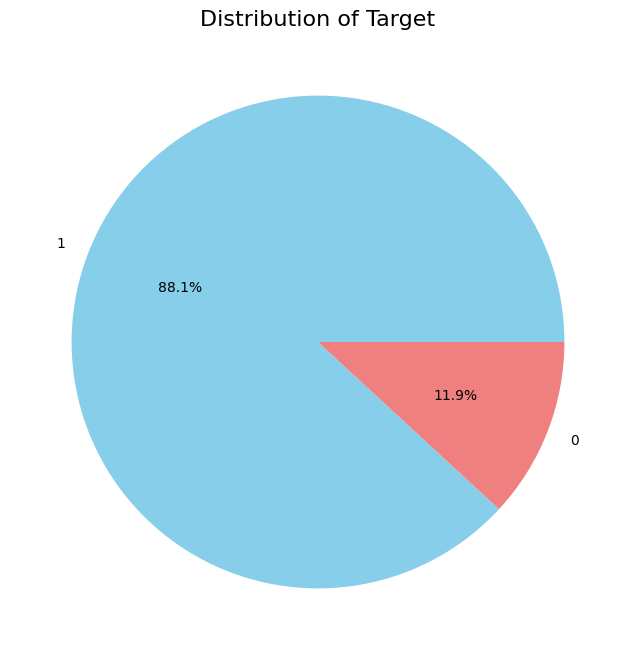

In [ ]:
target_counts = df['target'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Target', fontsize=16)
plt.show()


In [ ]:
col_to_drop=[
    #unnecessary
    'Unnamed: 0','id','member_id','url',	'desc',
    #null values
    'annual_inc_joint','dti_joint','verification_status_joint','open_acc_6m',	'open_il_6m',	'open_il_12m'	,'open_il_24m',
    'mths_since_rcnt_il',	'total_bal_il',	'il_util',	'open_rv_12m',	'open_rv_24m',	'max_bal_bc',	'all_util','inq_fi'	,'total_cu_tl','inq_last_12m'
]
df = df.drop(columns=col_to_drop)

In [ ]:
df.sample(3)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,target
261356,12500,12500,12500.0,36 months,12.39,417.52,C,C1,PROBATION OFFICER,7 years,MORTGAGE,47000.0,Not Verified,Nov-14,n,debt_consolidation,Debt consolidation,462xx,IN,9.81,0.0,Nov-02,2.0,NaN,48.0,11.0,1.0,12255,72.9,37.0,w,0.00,0.00,13732.32000,13732.32,12500.00,1232.32,0.0,0.0,0.0,Sep-15,9983.24,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,0.0,183193.0,16800.0,1
280460,16000,16000,16000.0,60 months,10.99,347.80,B,B3,Business Manager,10+ years,MORTGAGE,105255.0,Verified,Oct-14,n,debt_consolidation,Debt consolidation,291xx,SC,34.83,0.0,Feb-02,1.0,40.0,NaN,18.0,0.0,12924,53.6,58.0,w,12779.56,12779.56,5197.46000,5197.46,3220.44,1977.02,0.0,0.0,0.0,Jan-16,347.80,Feb-16,Jan-16,0.0,45.0,1,INDIVIDUAL,0.0,0.0,397945.0,24100.0,1
169133,12000,12000,12000.0,36 months,13.11,404.97,B,B4,Universal Business Solutions Inc.,8 years,RENT,75000.0,Not Verified,Feb-13,n,debt_consolidation,ClearCards,303xx,GA,13.75,0.0,May-05,1.0,NaN,NaN,13.0,0.0,12140,51.2,25.0,f,0.00,0.00,14342.42383,14342.42,12000.00,2342.42,0.0,0.0,0.0,Apr-15,4229.45,NaN,Dec-15,0.0,NaN,1,INDIVIDUAL,0.0,0.0,36435.0,23700.0,1


# Exploratory Data Analysis

##Distribution Data Numerik

In [ ]:
num_col=df.select_dtypes(include=['int','float']).columns
num_col

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim', 'target'],
      dtype='object')

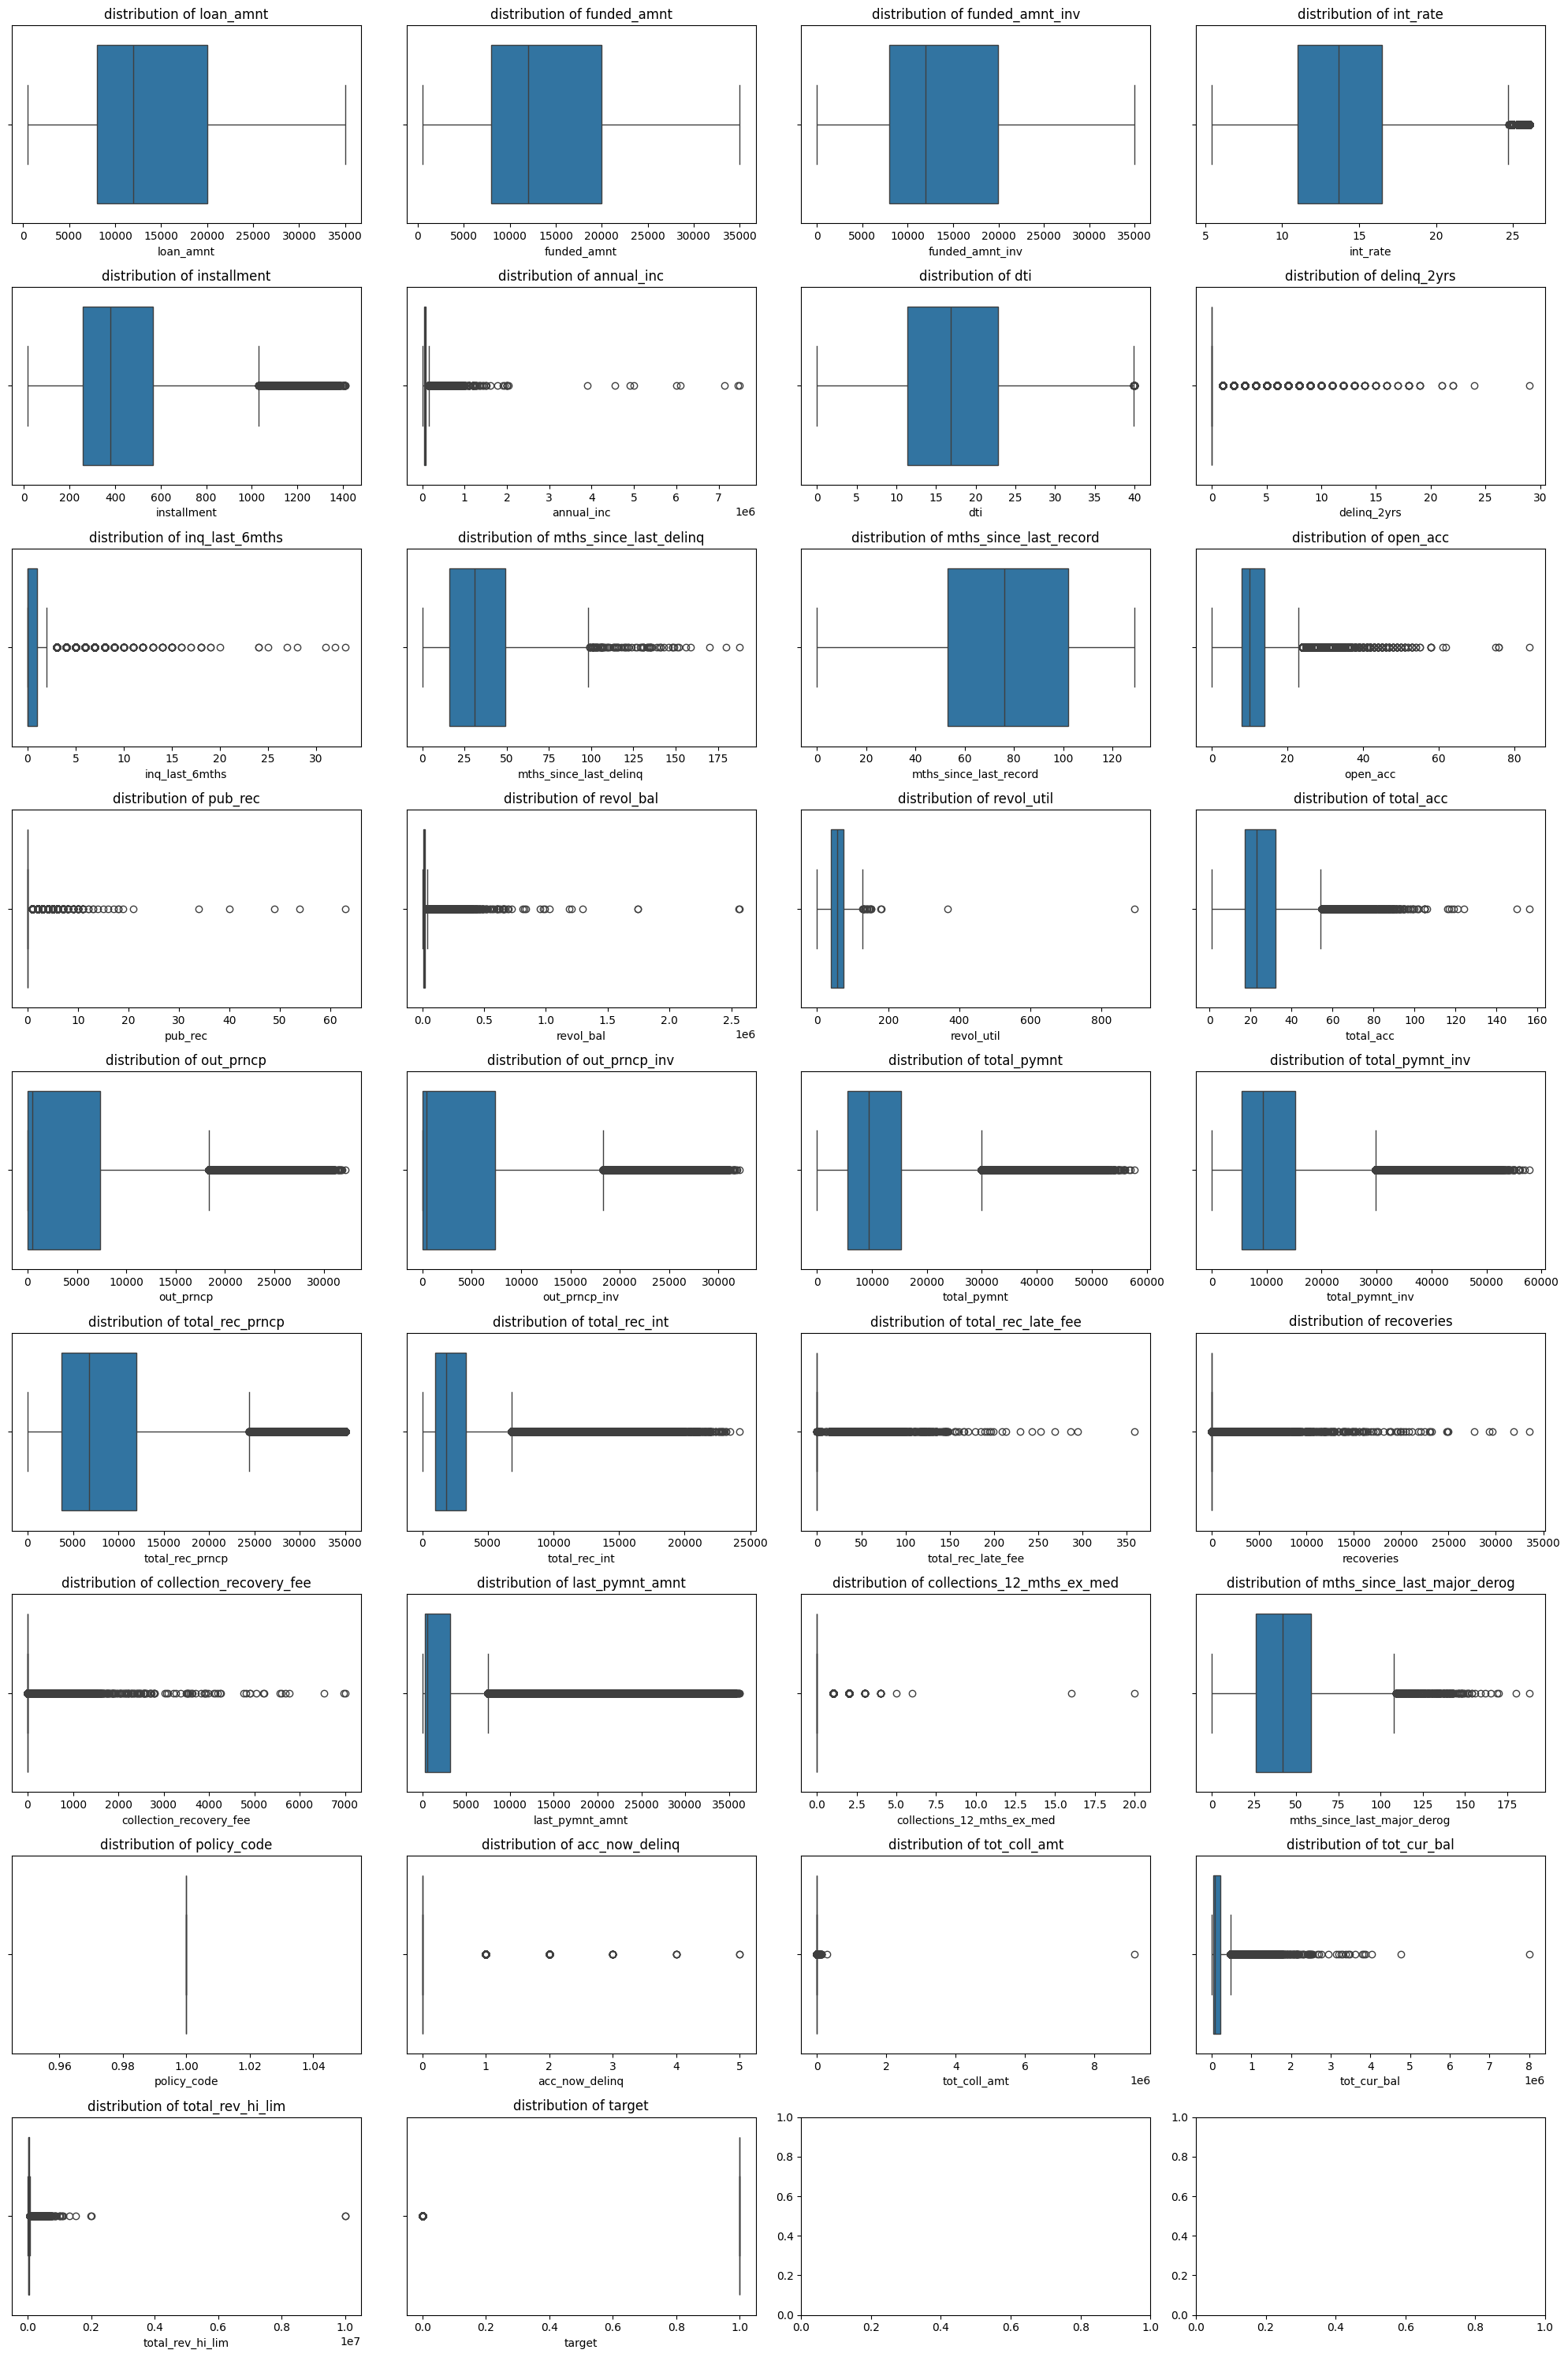

In [ ]:
num_col = df.select_dtypes(include=['int', 'float']).columns

fig, axs = plt.subplots(nrows=9, ncols=4, figsize=(20, 30))
axs = axs.flatten()

for i, column in enumerate(num_col):
    sns.boxplot(x=df[column], ax=axs[i])
    axs[i].set_title(f'distribution of {column}')
    axs[i].set_xlabel(column)

plt.tight_layout()
plt.show()


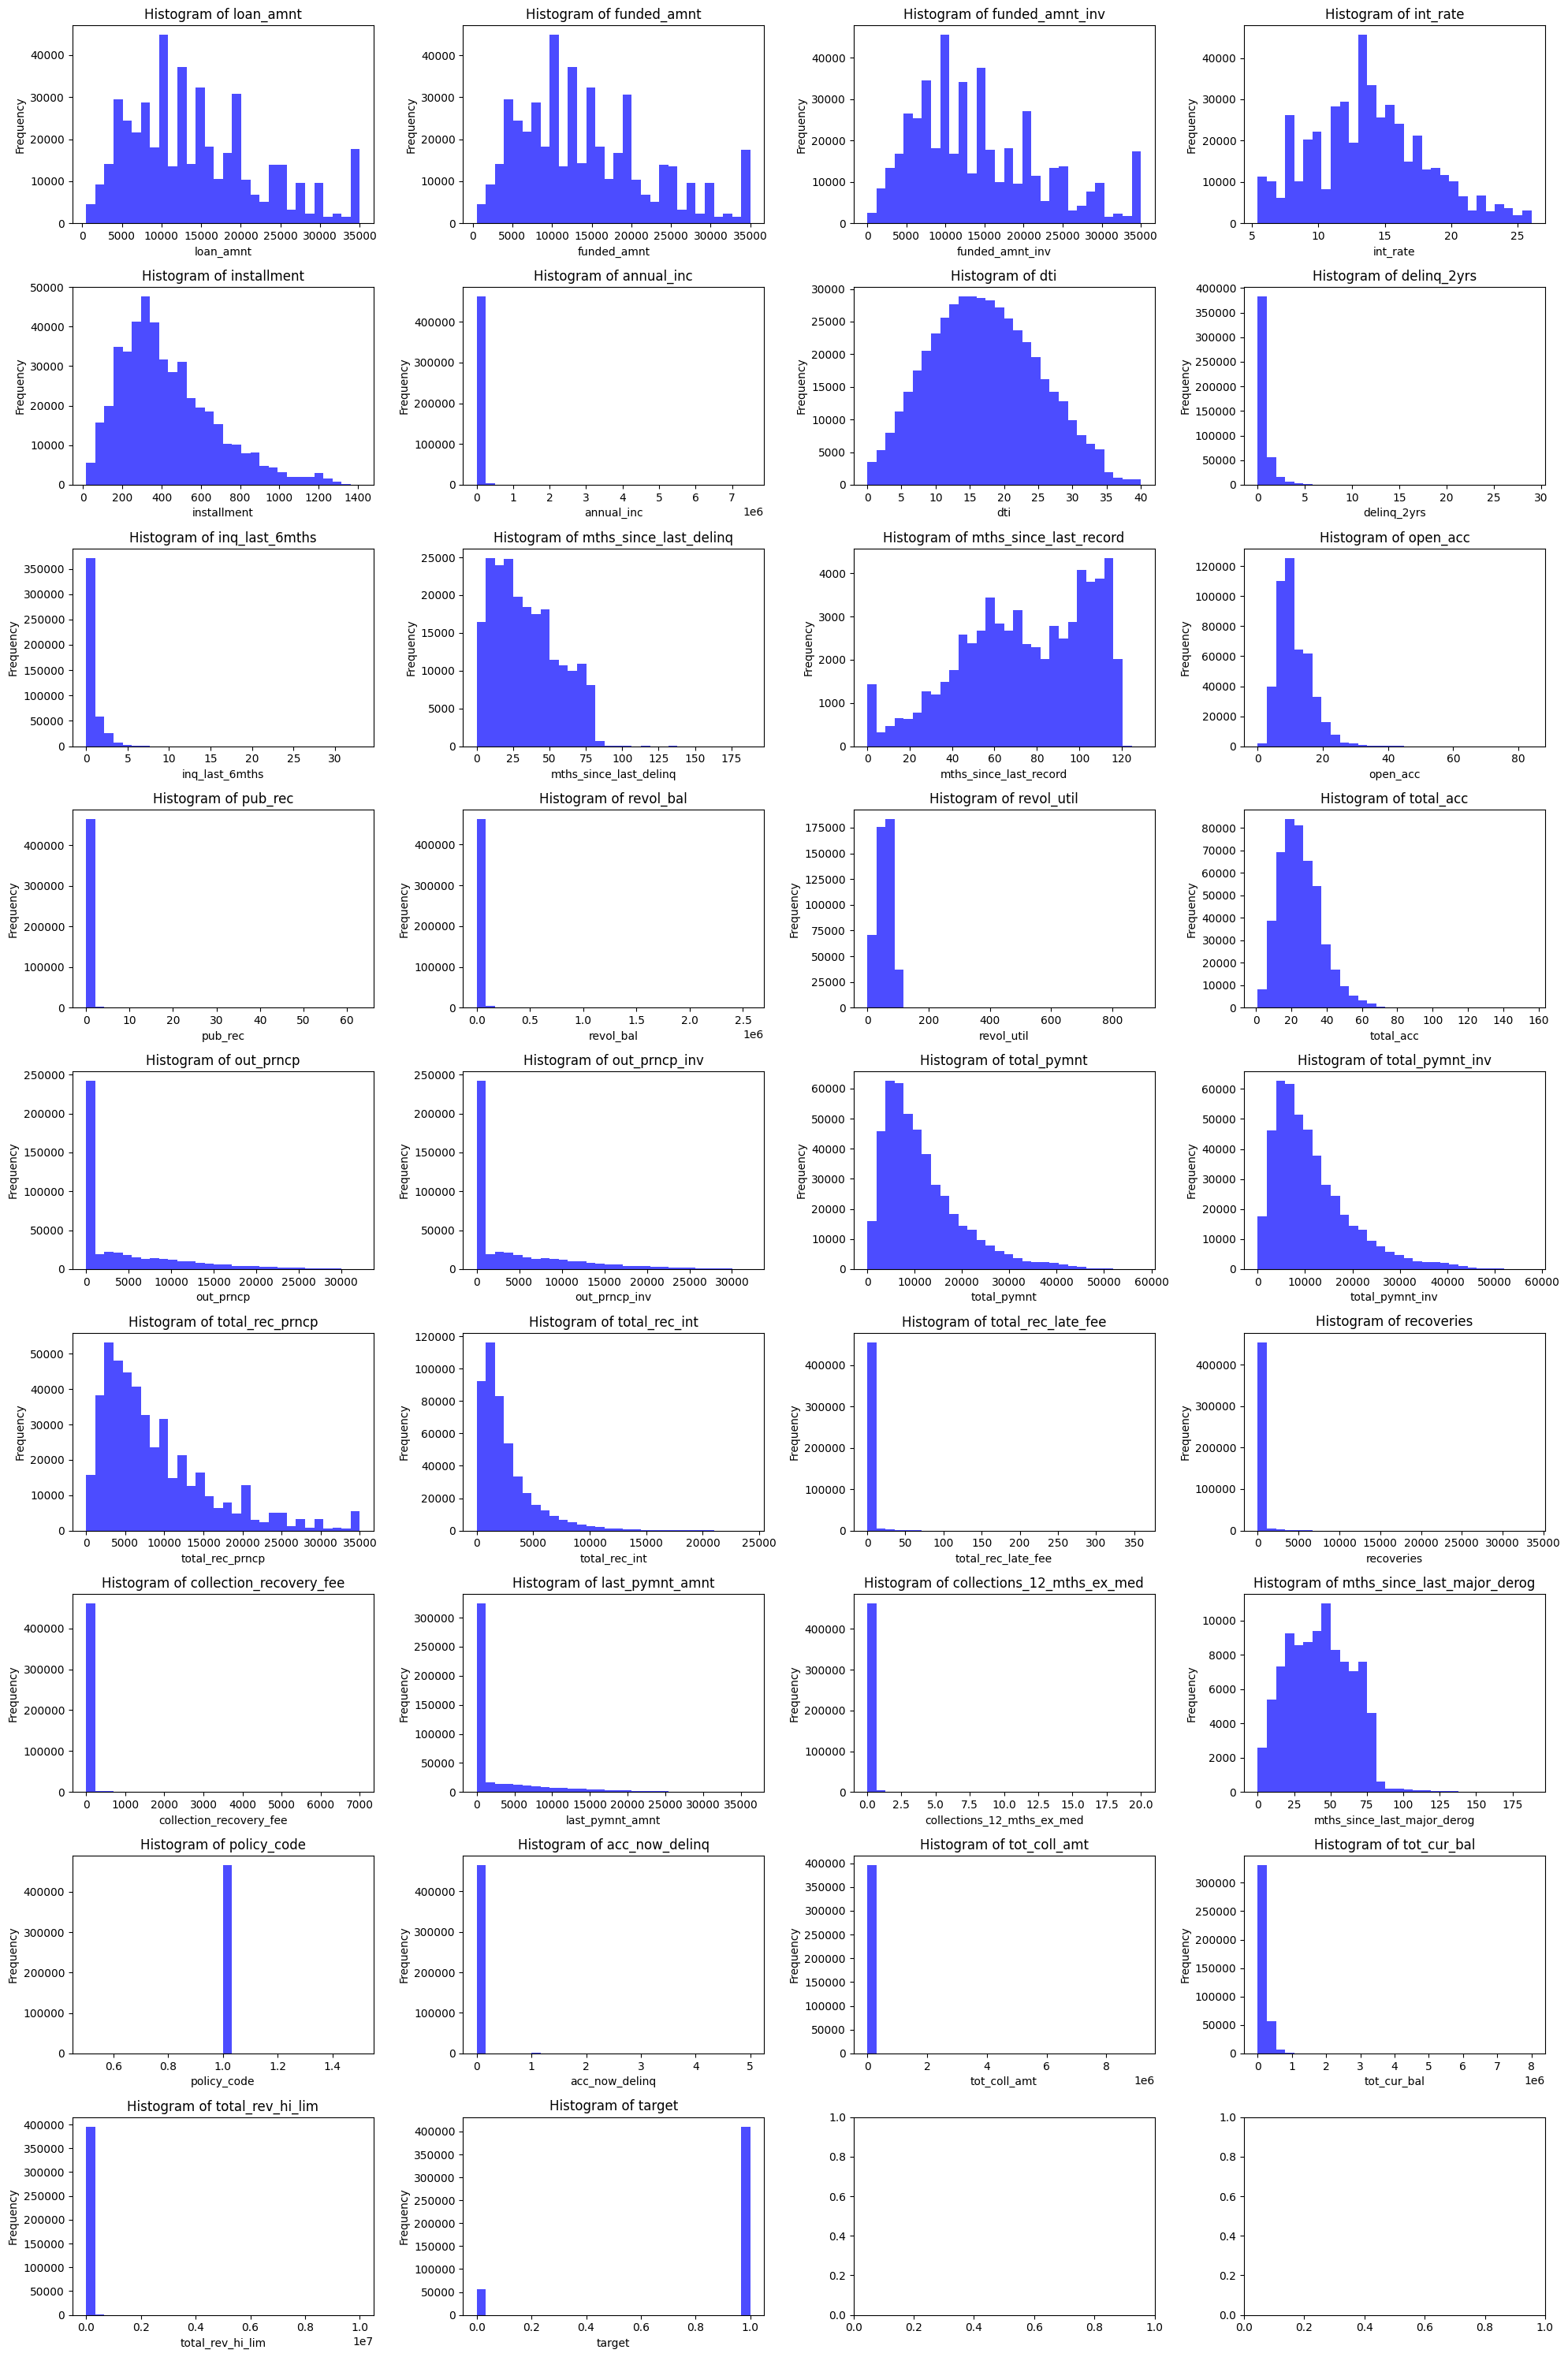

In [ ]:
fig, axs = plt.subplots(nrows=9, ncols=4, figsize=(20, 30), tight_layout=True)

for i, column in enumerate(num_col):
    axs[i // 4, i % 4].hist(df[column], bins=30, color='blue', alpha=0.7)
    axs[i // 4, i % 4].set_title(f'Histogram of {column}')
    axs[i // 4, i % 4].set_xlabel(column)
    axs[i // 4, i % 4].set_ylabel('Frequency')

plt.show()


### Distribution Data Numerik with target == 0

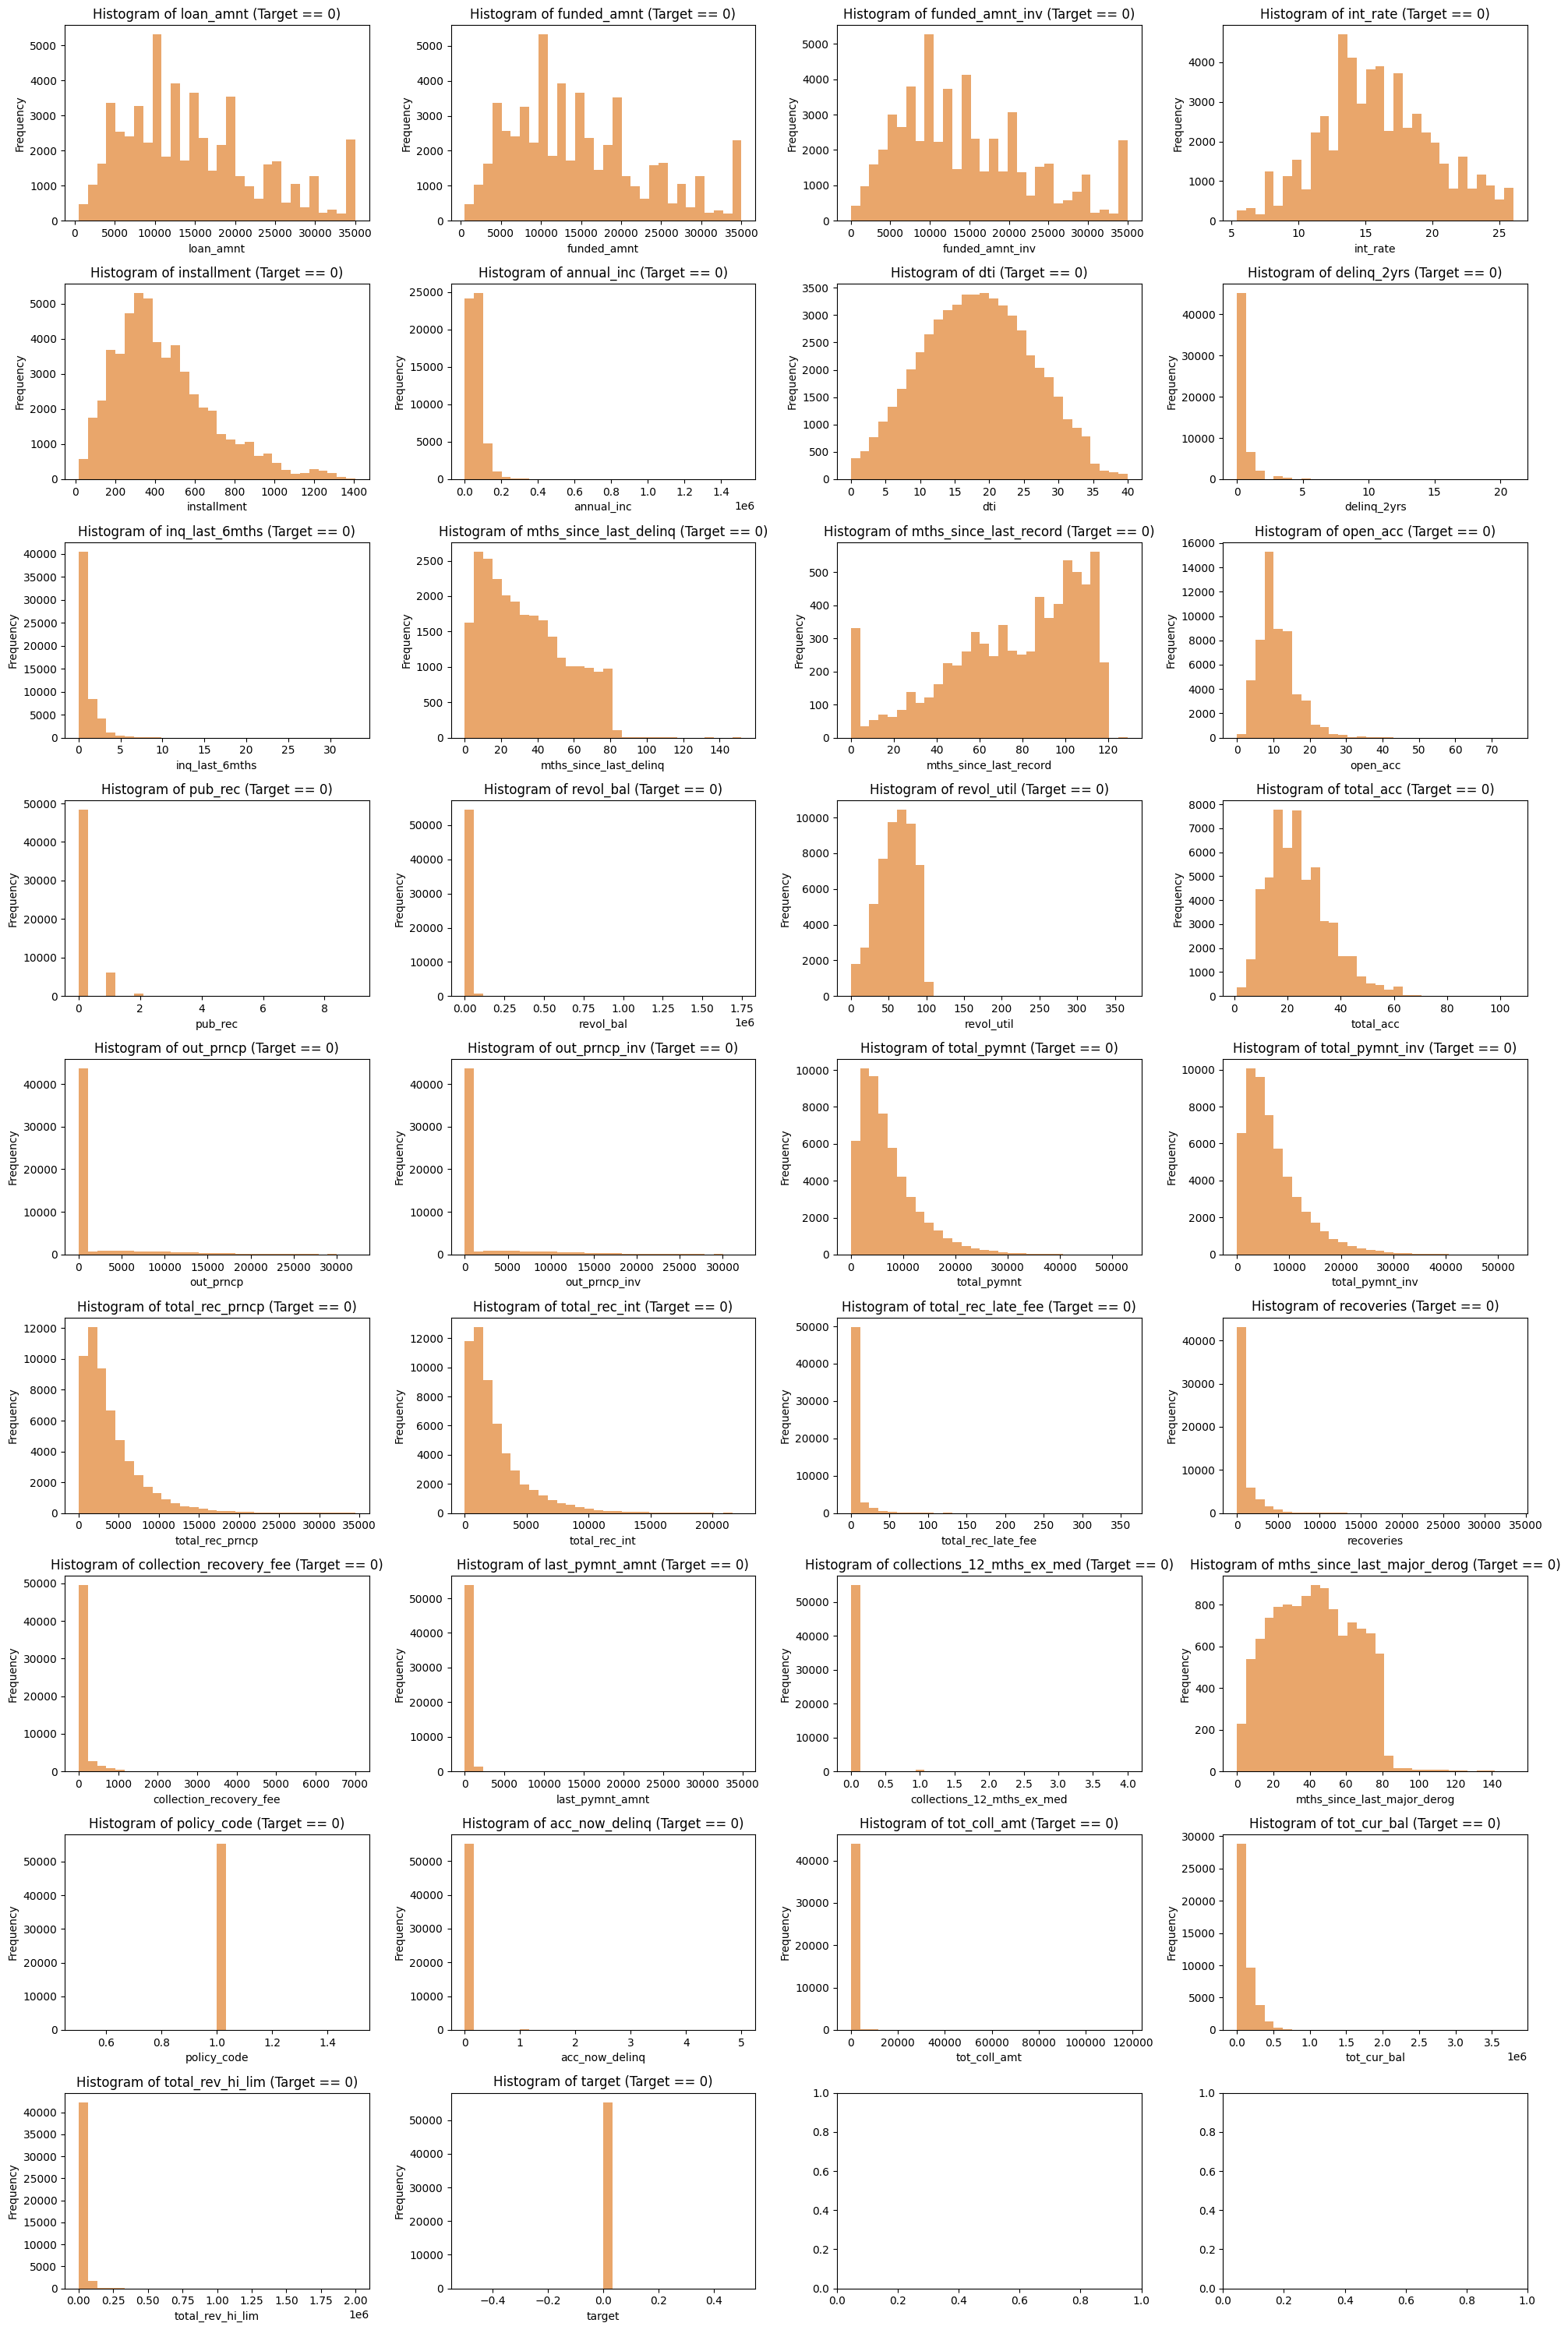

In [ ]:
fig, axs = plt.subplots(nrows=9, ncols=4, figsize=(20, 30), tight_layout=True)

for i, column in enumerate(num_col):
    axs[i // 4, i % 4].hist(df[df['target'] == 0][column], bins=30, color='#E1812C', alpha=0.7)
    axs[i // 4, i % 4].set_title(f'Histogram of {column} (Target == 0)')
    axs[i // 4, i % 4].set_xlabel(column)
    axs[i // 4, i % 4].set_ylabel('Frequency')


plt.show()


##Distribution Data Categorical

In [ ]:
var_col = df.select_dtypes(include=['object']).columns
var_col

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'pymnt_plan',
       'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line',
       'initial_list_status', 'last_pymnt_d', 'next_pymnt_d',
       'last_credit_pull_d', 'application_type'],
      dtype='object')

### Distribution Data Categorical with target

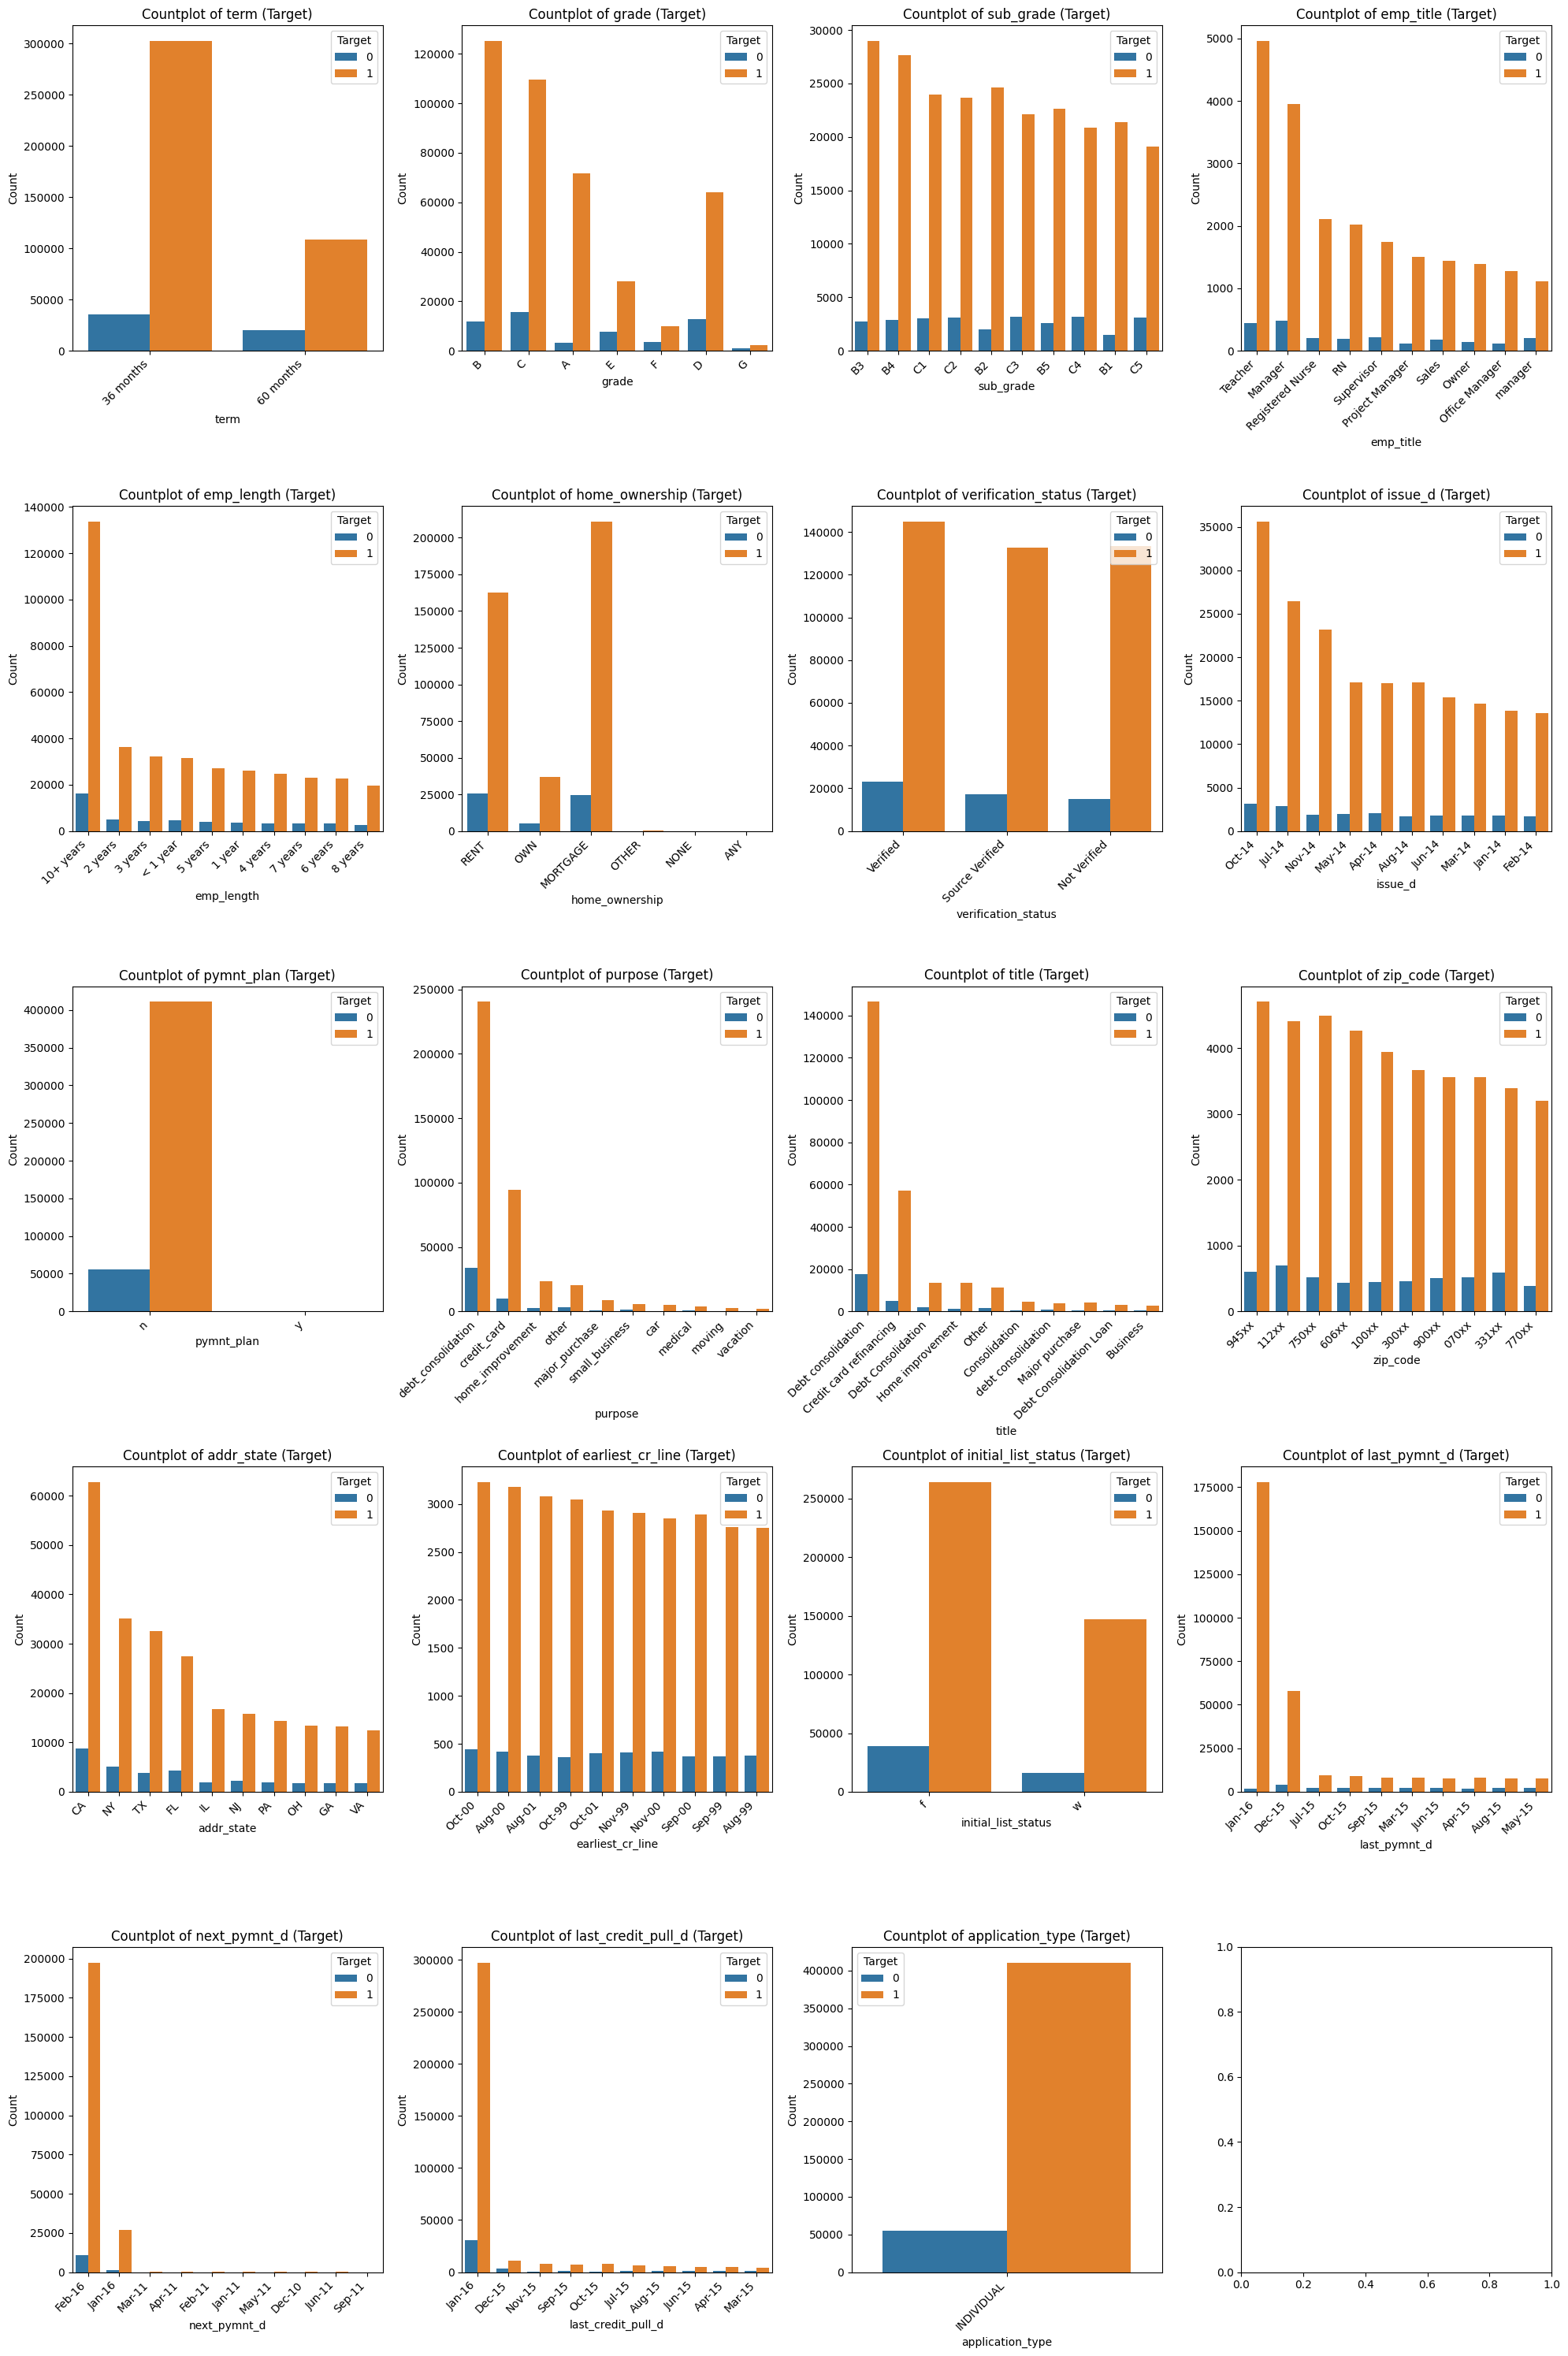

In [ ]:

fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(20, 30))
axs = axs.flatten()


for i, column in enumerate(var_col):
    if df[column].nunique() > 10:

        top_values = df[column].value_counts().head(10).index
        sns.countplot(x=column, data=df[df[column].isin(top_values)], order=top_values, ax=axs[i], hue='target')
    else:
        sns.countplot(x=column, data=df, ax=axs[i], hue='target')

    axs[i].set_xticks(axs[i].get_xticks())
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45, ha='right')
    axs[i].set_title(f'Countplot of {column} (Target)')
    axs[i].set_ylabel('Count')
    axs[i].legend(title='Target')

fig.tight_layout()

plt.show()


### Distribution Data Categorical with target == 0

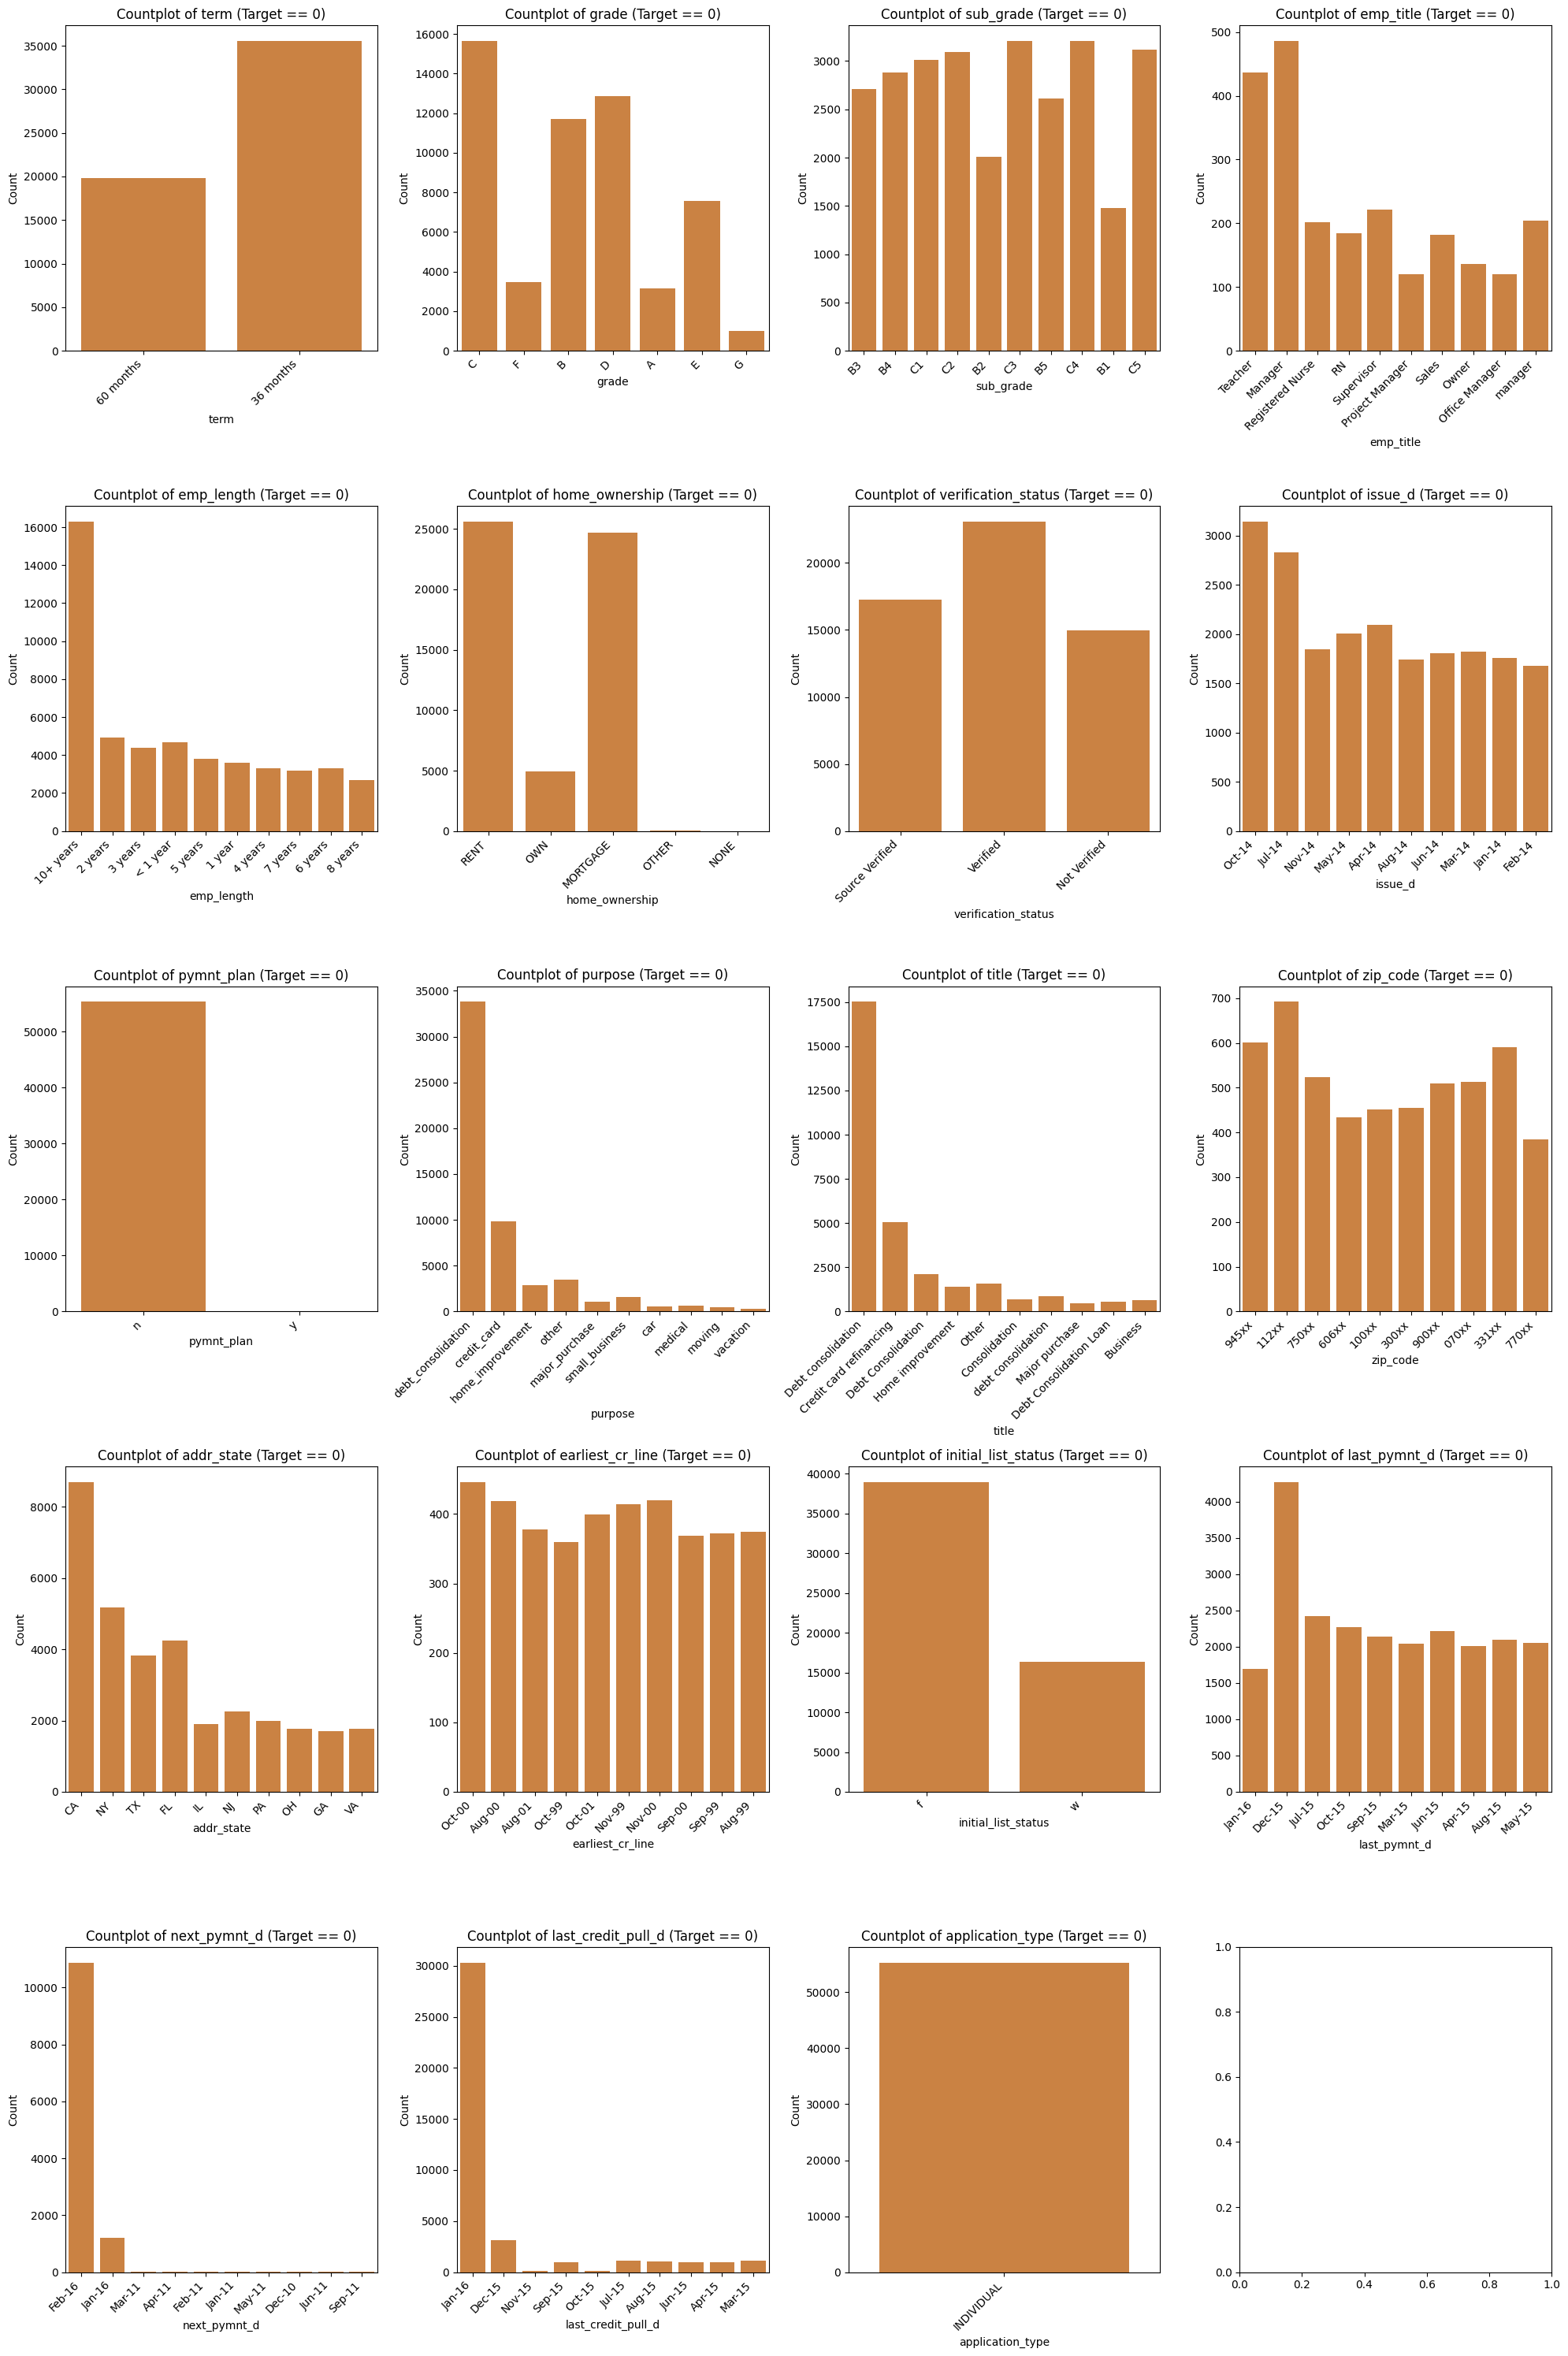

In [ ]:

fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(20, 30))
axs = axs.flatten()


for i, column in enumerate(var_col):
    if df[column].nunique() > 10:

        top_values = df[column].value_counts().head(10).index
        sns.countplot(x=column, data=df[(df['target'] == 0) & (df[column].isin(top_values))], order=top_values, ax=axs[i],color='#E1812C')
    else:
        sns.countplot(x=column, data=df[df['target'] == 0], ax=axs[i],color='#E1812C')

    axs[i].set_xticks(axs[i].get_xticks())
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45, ha='right')
    axs[i].set_title(f'Countplot of {column} (Target == 0)')
    axs[i].set_ylabel('Count')

fig.tight_layout()

plt.show()


# Data Preprocessing

## Handle missing values

In [ ]:
df_clean = df.copy()
df_clean.isnull().sum()[df_clean.isnull().sum() > 0]

emp_title                       27588
emp_length                      21008
annual_inc                          4
title                              20
delinq_2yrs                        29
earliest_cr_line                   29
inq_last_6mths                     29
mths_since_last_delinq         250351
mths_since_last_record         403647
open_acc                           29
pub_rec                            29
revol_util                        340
total_acc                          29
last_pymnt_d                      376
next_pymnt_d                   227214
last_credit_pull_d                 42
collections_12_mths_ex_med        145
mths_since_last_major_derog    367311
acc_now_delinq                     29
tot_coll_amt                    70276
tot_cur_bal                     70276
total_rev_hi_lim                70276
dtype: int64

check the reason why the column is 29 null value

In [ ]:
df_clean.isnull().sum()[df_clean.isnull().sum() == 29]

delinq_2yrs         29
earliest_cr_line    29
inq_last_6mths      29
open_acc            29
pub_rec             29
total_acc           29
acc_now_delinq      29
dtype: int64

In [ ]:
df_clean['delinq_2yrs'].value_counts()

0.0     382954
1.0      56224
2.0      16310
3.0       5684
4.0       2378
5.0       1236
6.0        629
7.0        346
8.0        177
9.0        111
10.0        65
11.0        41
12.0        38
13.0        25
14.0         8
15.0         7
18.0         6
16.0         5
17.0         3
19.0         3
21.0         2
22.0         2
29.0         1
24.0         1
Name: delinq_2yrs, dtype: int64

column = The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years

alternative = give null value with 0 (let's assume the user didn't have an incidences of delinquency)

In [ ]:
df_clean['earliest_cr_line'].value_counts()

Oct-00    3674
Aug-00    3597
Aug-01    3455
Oct-99    3406
Oct-01    3329
          ... 
Jul-55       1
Feb-57       1
Oct-54       1
May-53       1
Nov-56       1
Name: earliest_cr_line, Length: 664, dtype: int64

alternaive = skip and continue the analysis by looking fot the relationships with other dat values

In [ ]:
df_clean['inq_last_6mths'].value_counts()

0.0     241498
1.0     130148
2.0      57825
3.0      25126
4.0       7241
5.0       2768
6.0       1188
7.0        195
8.0        122
9.0         50
10.0        24
11.0        15
12.0        15
15.0         9
13.0         6
14.0         6
18.0         4
16.0         3
17.0         2
24.0         2
19.0         2
32.0         1
33.0         1
31.0         1
28.0         1
25.0         1
27.0         1
20.0         1
Name: inq_last_6mths, dtype: int64

column = Number of credit inquiries in past 12 months

alternative = give null value with 0 (let's assume the user didn't have a credit inquiries)

In [ ]:
df_clean['open_acc'].value_counts()

9.0     44019
10.0    42512
8.0     41893
11.0    39112
7.0     37602
        ...  
55.0        2
62.0        1
84.0        1
75.0        1
61.0        1
Name: open_acc, Length: 62, dtype: int64

In [ ]:
df_clean['open_acc'][df_clean['open_acc']==0]

103483    0.0
148345    0.0
169990    0.0
414731    0.0
426265    0.0
428538    0.0
464774    0.0
Name: open_acc, dtype: float64

column = The number of open credit lines in the borrower's credit file.

alternative = give null value with 0 (let's assume the user didn't open credit line)

In [ ]:
df_clean['pub_rec'].value_counts()

0.0     404893
1.0      53051
2.0       5624
3.0       1611
4.0        520
5.0        276
6.0        136
7.0         62
8.0         29
9.0         16
10.0        13
11.0         8
12.0         2
18.0         2
13.0         2
40.0         1
34.0         1
21.0         1
63.0         1
54.0         1
14.0         1
15.0         1
16.0         1
19.0         1
49.0         1
17.0         1
Name: pub_rec, dtype: int64

column = Number of derogatory public records

alternative = give null value with 0 (let's assume the user didn't have derogatory public records)



In [ ]:
df_clean['total_acc'].value_counts()

21.0     17087
20.0     17073
22.0     17028
23.0     16719
19.0     16709
         ...  
106.0        1
156.0        1
101.0        1
96.0         1
118.0        1
Name: total_acc, Length: 112, dtype: int64

In [ ]:
df_clean['total_acc'][df_clean['total_acc']==0]

Series([], Name: total_acc, dtype: float64)

column = The total number of credit lines currently in the borrower's credit file

alternative = give null value with 0 (let's assume that the user currently didn't have credit lines)

In [ ]:
df_clean['acc_now_delinq'].value_counts()

0.0    464524
1.0      1623
2.0        92
3.0        11
4.0         4
5.0         2
Name: acc_now_delinq, dtype: int64

column = The number of accounts on which the borrower is now delinquent.

alternative = give null value with 0 (let's assume that the user didn't have acc/credit that is now delinquent)

fill null with 0

In [ ]:
col_29=['delinq_2yrs','inq_last_6mths','open_acc','pub_rec',
'total_acc','acc_now_delinq']

for col in col_29:
  df_clean[col]=df_clean[col].fillna(0)

cek

In [ ]:
df_clean.isnull().sum()[df_clean.isnull().sum() == 29]

earliest_cr_line    29
dtype: int64

show column with date values

In [ ]:
df_clean.sample(1)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,target
194991,10625,10625,10625.0,36 months,14.33,364.85,C,C1,Bank of America,10+ years,MORTGAGE,53000.0,Verified,Oct-12,n,wedding,Personal,342xx,FL,23.89,1.0,Jan-90,1.0,4.0,NaN,13.0,0.0,11422,53.1,19.0,f,0.0,0.0,13133.58084,13133.58,10625.0,2508.58,0.0,0.0,0.0,Oct-15,366.07,NaN,Dec-15,0.0,NaN,1,INDIVIDUAL,0.0,623.0,202212.0,21500.0,1


In [ ]:
df_clean[['issue_d','earliest_cr_line','last_pymnt_d','next_pymnt_d','last_credit_pull_d']]

,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
0,Dec-11,Jan-85,Jan-15,NaN,Jan-16
1,Dec-11,Apr-99,Apr-13,NaN,Sep-13
2,Dec-11,Nov-01,Jun-14,NaN,Jan-16
3,Dec-11,Feb-96,Jan-15,NaN,Jan-15
4,Dec-11,Jan-96,Jan-16,Feb-16,Jan-16
...,...,...,...,...,...
466280,Jan-14,Apr-03,Jan-16,Feb-16,Jan-16
466281,Jan-14,Jun-97,Dec-14,NaN,Jan-16
466282,Jan-14,Dec-01,Jan-16,Feb-16,Dec-15
466283,Jan-14,Feb-03,Dec-14,NaN,Apr-15


column =

issue_d = The month which the loan was funded (bulan waktu pinjam)

earliest_cr_line = The month the borrower's earliest reported credit line was opened (bulan riwayat kredit)

last_pymnt_d = Last month payment was received (bulan waktu pembayaran terakhir)

next_payment_d = Next scheduled payment date (bulan pembayaran berikutnya)

last_credit_pull_d = when was the last day LC checked credit history (bulan saat LC cek history credit)



In [ ]:
df_clean[['issue_d','earliest_cr_line','last_pymnt_d','next_pymnt_d','last_credit_pull_d']].isnull().sum()

issue_d                    0
earliest_cr_line          29
last_pymnt_d             376
next_pymnt_d          227214
last_credit_pull_d        42
dtype: int64

column feature engineering

month_since_earliest_cr (issue - earliest)

month_since_last_payment (last - issue)

month_since_last_check (last_pull - issue)

payment_status (next_payment)

In [ ]:
df_clean[['issue_d','earliest_cr_line']][df_clean['issue_d']==df_clean['earliest_cr_line']]

,issue_d,earliest_cr_line


In [ ]:
df_clean[['issue_d','earliest_cr_line','last_pymnt_d','next_pymnt_d','last_credit_pull_d']][df_clean['last_pymnt_d'].isnull()]


,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
26,Dec-11,Oct-03,NaN,NaN,Jan-16
2731,Nov-11,Nov-97,NaN,NaN,Jan-16
3625,Nov-11,Jun-06,NaN,NaN,Apr-12
3998,Nov-11,Aug-08,NaN,NaN,Jan-16
4220,Nov-11,Oct-98,NaN,NaN,Jan-16
...,...,...,...,...,...
455499,Jan-14,Apr-96,NaN,NaN,Jun-14
458391,Jan-14,Jun-03,NaN,NaN,Jun-14
459366,Jan-14,Feb-04,NaN,NaN,Jan-16
464853,Jan-14,Jan-01,NaN,NaN,Jun-14


In [ ]:
df_clean['earliest_cr_line'].fillna(df_clean['issue_d'], inplace=True)
df_clean['last_pymnt_d'].fillna(df_clean['issue_d'], inplace=True)
df_clean['last_credit_pull_d'].fillna(df_clean['issue_d'], inplace=True)
df_clean[['issue_d','earliest_cr_line','last_pymnt_d','next_pymnt_d','last_credit_pull_d']][df_clean['last_pymnt_d']==df_clean['issue_d']]

,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
26,Dec-11,Oct-03,Dec-11,NaN,Jan-16
2731,Nov-11,Nov-97,Nov-11,NaN,Jan-16
3625,Nov-11,Jun-06,Nov-11,NaN,Apr-12
3998,Nov-11,Aug-08,Nov-11,NaN,Jan-16
4220,Nov-11,Oct-98,Nov-11,NaN,Jan-16
...,...,...,...,...,...
455499,Jan-14,Apr-96,Jan-14,NaN,Jun-14
458391,Jan-14,Jun-03,Jan-14,NaN,Jun-14
459366,Jan-14,Feb-04,Jan-14,NaN,Jan-16
464853,Jan-14,Jan-01,Jan-14,NaN,Jun-14


In [ ]:
date_columns = ['issue_d','earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

for column in date_columns:
    df_clean[column] = pd.to_datetime(df_clean[column], format='%b-%y')
    # Handling cases where the year is greater than 24 (considering 1900s)
    df_clean.loc[df_clean[column].dt.year > 2024, column] -= pd.DateOffset(years=100)
df_clean[['issue_d','earliest_cr_line','last_pymnt_d','next_pymnt_d','last_credit_pull_d']][df_clean['last_pymnt_d']==df_clean['issue_d']]

,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
26,2011-12-01,2003-10-01,2011-12-01,NaT,2016-01-01
2731,2011-11-01,1997-11-01,2011-11-01,NaT,2016-01-01
3625,2011-11-01,2006-06-01,2011-11-01,NaT,2012-04-01
3998,2011-11-01,2008-08-01,2011-11-01,NaT,2016-01-01
4220,2011-11-01,1998-10-01,2011-11-01,NaT,2016-01-01
...,...,...,...,...,...
455499,2014-01-01,1996-04-01,2014-01-01,NaT,2014-06-01
458391,2014-01-01,2003-06-01,2014-01-01,NaT,2014-06-01
459366,2014-01-01,2004-02-01,2014-01-01,NaT,2016-01-01
464853,2014-01-01,2001-01-01,2014-01-01,NaT,2014-06-01


column feature engineering

month_since_earliest_cr (issue - earliest)

month_since_last_payment (last - issue)

month_since_last_check (last_pull - issue)

payment_status (next_payment)

In [ ]:
# Konversi kolom-kolom ke format datetime
df_clean['issue_d'] = pd.to_datetime(df_clean['issue_d'])
df_clean['earliest_cr_line'] = pd.to_datetime(df_clean['earliest_cr_line'])
df_clean['last_pymnt_d'] = pd.to_datetime(df_clean['last_pymnt_d'])
df_clean['last_credit_pull_d'] = pd.to_datetime(df_clean['last_credit_pull_d'])

# Menghitung selisih bulan dengan include tahun
df_clean['month_since_earliest_cr'] = (df_clean['issue_d'].dt.year - df_clean['earliest_cr_line'].dt.year) * 12 + df_clean['issue_d'].dt.month - df_clean['earliest_cr_line'].dt.month
df_clean['month_since_last_payment'] = (df_clean['last_pymnt_d'].dt.year - df_clean['issue_d'].dt.year) * 12 + df_clean['last_pymnt_d'].dt.month - df_clean['issue_d'].dt.month
df_clean['month_since_last_check'] = (df_clean['last_credit_pull_d'].dt.year - df_clean['issue_d'].dt.year) * 12 + df_clean['last_credit_pull_d'].dt.month - df_clean['issue_d'].dt.month
# Payment Status
df_clean['payment_status'] = np.where(df_clean['next_pymnt_d'].isnull(), 'done payment', 'still in payment')

df_clean[['issue_d','earliest_cr_line','last_pymnt_d','next_pymnt_d','last_credit_pull_d','month_since_earliest_cr','month_since_last_payment','month_since_last_check','payment_status']][df_clean['earliest_cr_line']==df_clean['issue_d']].sample(4)

,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d,month_since_earliest_cr,month_since_last_payment,month_since_last_check,payment_status
42528,2007-06-01,2007-06-01,2010-07-01,2010-08-01,2010-07-01,0,37,37,still in payment
42530,2007-06-01,2007-06-01,2008-03-01,2008-03-01,2013-02-01,0,9,68,still in payment
42517,2007-06-01,2007-06-01,2010-06-01,2010-07-01,2010-06-01,0,36,36,still in payment
42520,2007-06-01,2007-06-01,2008-01-01,2008-01-01,2007-06-01,0,7,0,still in payment


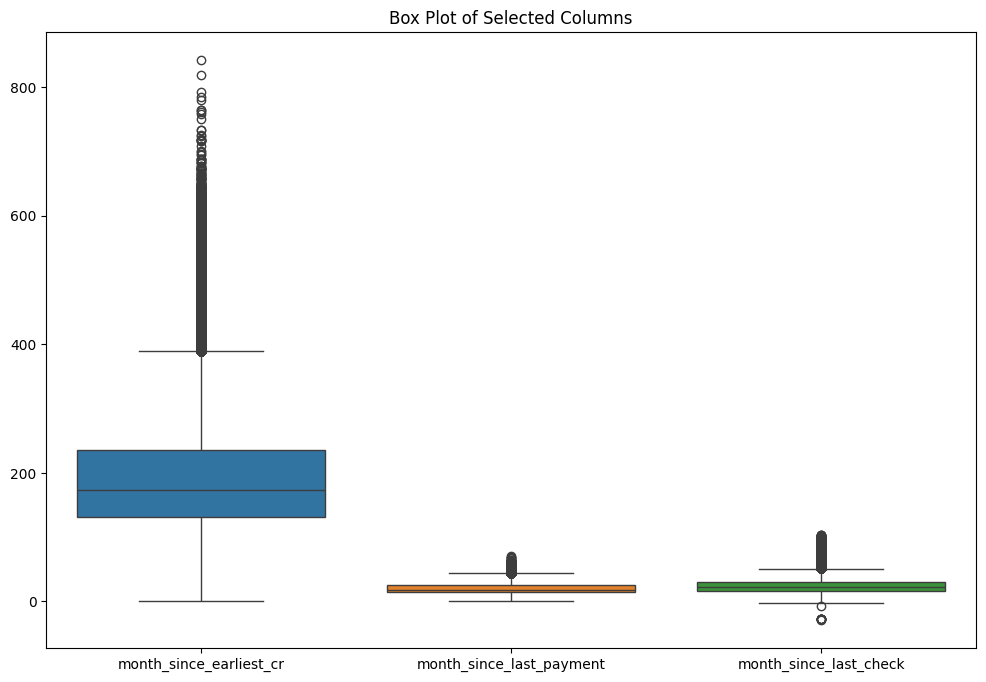

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List kolom yang ingin dibuat box plot
columns_to_plot = ['month_since_earliest_cr', 'month_since_last_payment', 'month_since_last_check']

# Membuat box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_clean[columns_to_plot])
plt.title('Box Plot of Selected Columns')
plt.show()


drop kolom with date values

In [ ]:
date_col = [	"issue_d",	"earliest_cr_line"	,"last_pymnt_d",	"next_pymnt_d",	"last_credit_pull_d"]
df_clean=df_clean.drop(columns=date_col)


In [ ]:
df_clean.isnull().sum()[df_clean.isnull().sum()>0]

emp_title                       27588
emp_length                      21008
annual_inc                          4
title                              20
mths_since_last_delinq         250351
mths_since_last_record         403647
revol_util                        340
collections_12_mths_ex_med        145
mths_since_last_major_derog    367311
tot_coll_amt                    70276
tot_cur_bal                     70276
total_rev_hi_lim                70276
dtype: int64

check the reason why the column have 70726 missing values

In [ ]:
df_clean.isnull().sum()[df_clean.isnull().sum()==70276]

tot_coll_amt        70276
tot_cur_bal         70276
total_rev_hi_lim    70276
dtype: int64

column explanation

tot_col_amt =Total collection amounts ever owed (jumlah pengumpulan yan pernah ada)

tot_cur_ball = Total current balance of all accounts (total saldo saat ini)

total_rev_hi_lim = Total revolving high credit/credit limit (total batas kredit)

In [ ]:
df_clean[["tot_coll_amt","tot_cur_bal","total_rev_hi_lim"]][df_clean["total_rev_hi_lim"]==0]

,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
44642,0.0,263448.0,0.0
46942,0.0,5527.0,0.0
47571,0.0,10452.0,0.0
51413,0.0,50047.0,0.0
53454,0.0,17668.0,0.0
...,...,...,...
449512,0.0,26750.0,0.0
451515,0.0,121437.0,0.0
459356,0.0,16477.0,0.0
464273,0.0,8805.0,0.0


In [ ]:
df_clean['tot_coll_amt'][df_clean['tot_coll_amt']==0]

42535     0.0
42536     0.0
42537     0.0
42540     0.0
42541     0.0
         ... 
466280    0.0
466281    0.0
466282    0.0
466283    0.0
466284    0.0
Name: tot_coll_amt, Length: 346259, dtype: float64

In [ ]:
df_clean['tot_cur_bal'][df_clean['tot_cur_bal']==0]

47870     0.0
55321     0.0
62720     0.0
63377     0.0
63531     0.0
         ... 
454916    0.0
460595    0.0
462462    0.0
463465    0.0
464774    0.0
Name: tot_cur_bal, Length: 78, dtype: float64

In [ ]:
df_clean['total_rev_hi_lim'][df_clean['total_rev_hi_lim']==0]

44642     0.0
46942     0.0
47571     0.0
51413     0.0
53454     0.0
         ... 
449512    0.0
451515    0.0
459356    0.0
464273    0.0
464774    0.0
Name: total_rev_hi_lim, Length: 155, dtype: float64

because all three columns contain zero values, let's assume that there are zero values in the columns

 tot_col_amt = user has no collection amount

 tot_cur_ball = current user has no balance

 total_rev_hi_lim = user has no credit limit

In [ ]:
fill_zero = ['tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']

for col in fill_zero:
    df_clean[col] = df_clean[col].fillna(0)


other missing values

In [ ]:
df_clean.isnull().sum()[df_clean.isnull().sum()>0]

emp_title                       27588
emp_length                      21008
annual_inc                          4
title                              20
mths_since_last_delinq         250351
mths_since_last_record         403647
revol_util                        340
collections_12_mths_ex_med        145
mths_since_last_major_derog    367311
dtype: int64

In [ ]:
df_clean['emp_title'].value_counts()

Teacher                              5399
Manager                              4438
Registered Nurse                     2316
RN                                   2204
Supervisor                           1967
                                     ... 
The Eastern Arizona AHEC                1
Delaware Quarries.com                   1
McCauley trucking and warehousing       1
save mart supermarkets                  1
Server Engineer Lead                    1
Name: emp_title, Length: 205475, dtype: int64

There are too many variations in this column. To avoid overfitting, it is better to delete this column

In [ ]:
df_clean=df_clean.drop(columns='emp_title')

In [ ]:
df_clean['emp_length'].value_counts()

10+ years    150049
2 years       41373
3 years       36596
< 1 year      36265
5 years       30774
1 year        29622
4 years       28023
7 years       26180
6 years       26112
8 years       22395
9 years       17888
Name: emp_length, dtype: int64

In [ ]:
df[df['emp_length'].isnull()].sample(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,target
29953,17000,11025,11025.000,60 months,7.88,222.92,A,A5,NaN,NaN,RENT,45000.0,Not Verified,May-10,n,debt_consolidation,Debt merger,913xx,CA,20.77,0.0,Jan-87,1.0,NaN,NaN,6.0,0.0,9164,45.6,19.0,f,0.00,0.00,13370.50607,13370.51,11025.00,2345.51,0.000000,0.00,0.00,Jun-15,238.03,NaN,May-15,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN,1
249867,15000,15000,15000.000,60 months,14.31,351.44,C,C4,NaN,NaN,MORTGAGE,36000.0,Verified,Nov-14,n,debt_consolidation,Debt consolidation,895xx,NV,20.53,0.0,Nov-01,0.0,42.0,NaN,9.0,0.0,14949,49.5,17.0,w,12588.91,12588.91,4544.87000,4544.87,2411.09,2133.78,0.000000,0.00,0.00,Jan-16,351.44,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,0.0,24891.0,30200.0,1
402704,2000,2000,2000.000,36 months,14.64,68.98,C,C3,NaN,NaN,RENT,60000.0,Source Verified,Apr-14,n,other,Other,984xx,WA,20.78,2.0,Oct-01,1.0,5.0,NaN,6.0,0.0,4077,26.0,19.0,w,1198.49,1198.49,1179.80000,1179.80,801.51,378.29,0.000000,0.00,0.00,Dec-15,80.00,Jan-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,0.0,5656.0,15700.0,0
40666,14500,14500,11624.998,36 months,21.64,551.08,G,G5,NaN,NaN,RENT,60000.0,Verified,Feb-10,n,other,personal loean,104xx,NY,24.06,0.0,Mar-05,9.0,NaN,NaN,11.0,0.0,16441,49.8,23.0,f,0.00,0.00,14845.16000,11899.75,10490.95,3339.72,55.050739,959.44,335.17,Nov-11,300.00,Jan-12,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN,0
31065,9000,9000,8950.000,36 months,14.59,310.19,D,D1,NaN,NaN,RENT,43200.0,Not Verified,Apr-10,n,debt_consolidation,Trying To Live,110xx,NY,18.11,0.0,May-96,1.0,NaN,NaN,11.0,0.0,22427,89.4,17.0,f,0.00,0.00,11164.06000,11102.04,9000.00,2164.06,0.000000,0.00,0.00,Apr-13,323.83,NaN,Dec-12,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN,1


from the sample data of users with null empt length, most of them also have null empt length title, let's assume that the user is not working and fill in the empt length column with < 1 year

In [ ]:
df_clean['emp_length']=df_clean['emp_length'].fillna('< 1 year')
df_clean['emp_length'].isnull().sum()

0

In [ ]:
df_clean[df_clean['annual_inc'].isnull()]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,target,month_since_earliest_cr,month_since_last_payment,month_since_last_check,payment_status
42449,5000,5000,3025.0,36 months,7.43,155.38,A,A2,< 1 year,NONE,NaN,Not Verified,n,other,Moving expenses,100xx,NY,1.0,0.0,0.0,NaN,NaN,0.0,0.0,0,NaN,0.0,f,0.0,0.0,5593.46,3384.01,5000.0,593.46,0.0,0.0,0.0,157.31,NaN,NaN,1,INDIVIDUAL,0.0,0.0,0.0,0.0,1,0,36,-3,still in payment
42450,7000,7000,3450.0,36 months,7.75,218.55,A,A3,< 1 year,NONE,NaN,Not Verified,n,other,Education,100xx,NY,1.0,0.0,0.0,NaN,NaN,0.0,0.0,0,NaN,0.0,f,0.0,0.0,7867.53,3877.59,7000.0,867.53,0.0,0.0,0.0,220.03,NaN,NaN,1,INDIVIDUAL,0.0,0.0,0.0,0.0,1,0,36,-3,still in payment
42480,6700,6700,6700.0,36 months,7.75,209.18,A,A3,< 1 year,NONE,NaN,Not Verified,n,other,Moving expenses and security deposit,100xx,NY,1.0,0.0,0.0,NaN,NaN,0.0,0.0,0,NaN,0.0,f,0.0,0.0,7530.42,7530.42,6700.0,830.42,0.0,0.0,0.0,209.89,NaN,NaN,1,INDIVIDUAL,0.0,0.0,0.0,0.0,1,0,36,-2,still in payment
42533,6500,6500,0.0,36 months,8.38,204.84,A,A5,< 1 year,NONE,NaN,Not Verified,n,other,Buying a car,100xx,NY,4.0,0.0,0.0,NaN,NaN,0.0,0.0,0,NaN,0.0,f,0.0,0.0,7373.83,0.00,6500.0,873.83,0.0,0.0,0.0,205.32,NaN,NaN,1,INDIVIDUAL,0.0,0.0,0.0,0.0,1,0,36,2,still in payment


In [ ]:
df_clean['annual_inc'][df_clean['annual_inc']==0]

Series([], Name: annual_inc, dtype: float64)

because only 4 values are missing and annual income is a credit sensitive assessment, it is better to drop it

In [ ]:
df_clean = df_clean.dropna(subset=['annual_inc'])

In [ ]:
df_clean.isnull().sum()[df_clean.isnull().sum()>0]

title                              20
mths_since_last_delinq         250347
mths_since_last_record         403643
revol_util                        336
collections_12_mths_ex_med        141
mths_since_last_major_derog    367307
dtype: int64

In [ ]:
df_clean[['title','purpose']].sample(5)

,title,purpose
435801,Medical expenses,medical
194320,Credit Card Loan,credit_card
24863,Sidney's Debt,debt_consolidation
73168,World Series Fund,debt_consolidation
413468,Debt consolidation,debt_consolidation


In [ ]:
df_clean['title'].value_counts()

Debt consolidation                   164075
Credit card refinancing               62275
Debt Consolidation                    15760
Home improvement                      14849
Other                                 12713
                                      ...  
Credit Card Clearance                     1
credit repayment                          1
medical bills/credit card payoff          1
One Time Only Relief!                     1
Paying off the car and some bills         1
Name: title, Length: 63098, dtype: int64

In [ ]:
df_clean['purpose'].value_counts()

debt_consolidation    274195
credit_card           104157
home_improvement       26537
other                  23686
major_purchase          9828
small_business          7013
car                     5397
medical                 4602
moving                  2994
vacation                2487
wedding                 2343
house                   2269
educational              422
renewable_energy         351
Name: purpose, dtype: int64

The title and purpose columns are almost similar in their reasons for taking credit, but the title has more variations, it would be better if the title columns are dropped

In [ ]:
df_clean=df_clean.drop(columns='title')

explore null in columns mths

In [ ]:
df_clean.isnull().sum()[df_clean.isnull().sum()>0]

mths_since_last_delinq         250347
mths_since_last_record         403643
revol_util                        336
collections_12_mths_ex_med        141
mths_since_last_major_derog    367307
dtype: int64

mths_since_last_delinq = The number of months since the borrower's last delinquency.(bulan sejak nunggak)

mths_since_last_record = The number of months since the last public record. (bulan sejak rekaman publik dicatat)

mths_since_last_major_derog = Months since most recent 90-day or worse rating(bulan sejak rating kredit terburuk terakhir)

In [ ]:
df_clean['mths_since_last_delinq'][df_clean['mths_since_last_delinq']==0]

35075     0.0
35431     0.0
38786     0.0
38797     0.0
38945     0.0
         ... 
458439    0.0
458470    0.0
459806    0.0
460958    0.0
465662    0.0
Name: mths_since_last_delinq, Length: 1223, dtype: float64

In [ ]:
df_clean['mths_since_last_record'][df_clean['mths_since_last_record']==0]

35075     0.0
35127     0.0
35431     0.0
38512     0.0
38786     0.0
         ... 
42512     0.0
42513     0.0
237895    0.0
272902    0.0
373814    0.0
Name: mths_since_last_record, Length: 1278, dtype: float64

In [ ]:
df_clean['mths_since_last_major_derog'][df_clean['mths_since_last_major_derog']==0]

62583     0.0
69971     0.0
72720     0.0
87231     0.0
87383     0.0
         ... 
447350    0.0
450565    0.0
457242    0.0
458470    0.0
460958    0.0
Name: mths_since_last_major_derog, Length: 79, dtype: float64

fill null mnth column with zero , assume that user with zero values in

delinq = aren't delinqued

last_record = didn't have public record

major_derog = aren't in worse rating

In [ ]:
col_mths=['mths_since_last_delinq','mths_since_last_record','mths_since_last_major_derog']

for col in col_mths:
    df_clean[col] = df_clean[col].fillna(0)

explore other

In [ ]:
df_clean.isnull().sum()[df_clean.isnull().sum()>0]

revol_util                    336
collections_12_mths_ex_med    141
dtype: int64

revol_util = Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit (rating seberapa sering credit dipakai)

collections_12_mths_ex_med = Number of collections in 12 months excluding medical collections (jumlah tunggakan pembayaran atau utang yang dikumpulkan oleh pihak kolektor dalam kurun waktu 12 bulan terakhir, namun tidak termasuk utang yang berasal dari tagihan medis.)

In [ ]:
df['revol_util'].value_counts()

0.00      2284
58.00      864
53.00      850
59.00      845
61.00      832
          ... 
8.49         1
88.48        1
7.43         1
11.63        1
141.80       1
Name: revol_util, Length: 1269, dtype: int64

In [ ]:
df['collections_12_mths_ex_med'].value_counts()

0.0     462226
1.0       3665
2.0        219
3.0         19
4.0          7
6.0          1
16.0         1
20.0         1
5.0          1
Name: collections_12_mths_ex_med, dtype: int64

assume the null value on revol util is that the user does not use credit. null on coll 12 the user has no collection

In [ ]:
col_other=['collections_12_mths_ex_med','revol_util']

for col in col_other:
    df_clean[col] = df_clean[col].fillna(0)

In [ ]:
df_clean

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,target,month_since_earliest_cr,month_since_last_payment,month_since_last_check,payment_status
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,n,credit_card,860xx,AZ,27.65,0.0,1.0,0.0,0.0,3.0,0.0,13648,83.7,9.0,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,0.0,0.0,1,INDIVIDUAL,0.0,0.0,0.0,0.0,1,323,37,49,done payment
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,n,car,309xx,GA,1.00,0.0,5.0,0.0,0.0,3.0,0.0,1687,9.4,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,0.0,1,INDIVIDUAL,0.0,0.0,0.0,0.0,0,152,16,21,done payment
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,n,small_business,606xx,IL,8.72,0.0,2.0,0.0,0.0,2.0,0.0,2956,98.5,10.0,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,0.0,0.0,1,INDIVIDUAL,0.0,0.0,0.0,0.0,1,121,30,49,done payment
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,n,other,917xx,CA,20.00,0.0,1.0,35.0,0.0,10.0,0.0,5598,21.0,37.0,f,0.00,0.00,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,0.0,0.0,1,INDIVIDUAL,0.0,0.0,0.0,0.0,1,190,37,37,done payment
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,n,other,972xx,OR,17.94,0.0,0.0,38.0,0.0,15.0,0.0,27783,53.9,38.0,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,0.0,0.0,1,INDIVIDUAL,0.0,0.0,0.0,0.0,1,191,49,49,still in payment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,18400,18400,18400.0,60 months,14.47,432.64,C,C2,4 years,MORTGAGE,110000.0,Source Verified,n,debt_consolidation,773xx,TX,19.85,0.0,2.0,0.0,0.0,18.0,0.0,23208,77.6,36.0,w,12574.00,12574.00,10383.360000,10383.36,5826.00,4557.36,0.00,0.00,0.00,432.64,0.0,0.0,1,INDIVIDUAL,0.0,0.0,294998.0,29900.0,1,129,24,24,still in payment
466281,22000,22000,22000.0,60 months,19.97,582.50,D,D5,10+ years,MORTGAGE,78000.0,Verified,n,debt_consolidation,377xx,TN,18.45,0.0,5.0,0.0,116.0,18.0,1.0,18238,46.3,30.0,f,0.00,0.00,4677.920000,4677.92,1837.04,2840.88,0.00,0.00,0.00,17.50,0.0,0.0,1,INDIVIDUAL,0.0,0.0,221830.0,39400.0,0,199,11,24,done payment
466282,20700,20700,20700.0,60 months,16.99,514.34,D,D1,7 years,MORTGAGE,46000.0,Verified,n,debt_consolidation,458xx,OH,25.65,0.0,2.0,65.0,0.0,18.0,0.0,6688,51.1,43.0,f,14428.31,14428.31,12343.980000,12343.98,6271.69,6072.29,0.00,0.00,0.00,514.34,0.0,0.0,1,INDIVIDUAL,0.0,0.0,73598.0,13100.0,1,145,24,23,still in payment
466283,2000,2000,2000.0,36 months,7.90,62.59,A,A4,3 years,OWN,83000.0,Verified,n,credit_card,913xx,CA,5.39,3.0,1.0,13.0,0.0,21.0,0.0,11404,21.5,27.0,w,0.00,0.00,2126.579838,2126.58,2000.00,126.58,0.00,0.00,0.00,1500.68,0.0,0.0,1,INDIVIDUAL,0.0,0.0,591610.0,53100.0,1,131,11,15,done payment


## Handle Outliers

In [ ]:
num_col = df.select_dtypes(include=['int','float']).columns
num_col

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim', 'target'],
      dtype='object')

In [ ]:
#
# columns_to_remove_outliers = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
#                                'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
#                                'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
#                                'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
#                                'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
#                                'total_rec_int', 'total_rec_late_fee', 'recoveries',
#                                'collection_recovery_fee', 'last_pymnt_amnt',
#                                'collections_12_mths_ex_med', 'mths_since_last_major_derog',
#                                'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
#                                'total_rev_hi_lim']

#
# for column in columns_to_remove_outliers:
#     Q1 = df_clean[column].quantile(0.25)
#     Q3 = df_clean[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#
#     df_clean = df_clean[(df_clean[column] >= lower_bound) & (df_clean[column] <= upper_bound)]

#
# print("Shape after removing outliers:", df_clean.shape)

**In this dataset, removing outliers is not recommended because it has a valid outlier distribution (not data input error), removing outliers causes overfitting in the decision tree model (99% accuracy), as well as underfitting in the logistic regression model (89% accuracy)**

## Handle Imbalance Data

In [ ]:
df_clean['target'].value_counts()

1    410949
0     55332
Name: target, dtype: int64

In [ ]:
# from imblearn.over_sampling import RandomOverSampler

# X = df_clean.drop(columns=['target'])
# y = df_clean['target']

# ros = RandomOverSampler(sampling_strategy='minority', random_state=42)

# X_resampled, y_resampled = ros.fit_resample(X, y)

# df_clean = pd.DataFrame(X_resampled, columns=X.columns)
# df_clean['target'] = y_resampled

# df_clean['target'].value_counts()

**On this dataset, oversampling is also not carried out because it causes underfitting in the logistic regression model due to an unbalanced distribution between classes, while in decision trees, oversampling results in overfitting because the model becomes too complex and sensitive to noise in the training data.**

## Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = df_clean.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()

for column in categorical_columns:
    df_clean[column] = label_encoder.fit_transform(df_clean[column])


##Minmax scalar

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_clean_normalized = pd.DataFrame(scaler.fit_transform(df_clean), columns=df_clean.columns)

#Model

Train,Test split data

In [ ]:
from sklearn.model_selection import train_test_split

X = df_clean_normalized.drop(columns=['target'])
y = df_clean_normalized['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

dt_classifier = DecisionTreeClassifier(random_state=42)

# Train
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred = dt_classifier.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print("Decision Tree Classifier Performance:")
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Decision Tree Classifier Performance:
Accuracy: 0.9713

Confusion Matrix:
[[ 14755   1767]
 [  2248 121115]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88     16522
         1.0       0.99      0.98      0.98    123363

    accuracy                           0.97    139885
   macro avg       0.93      0.94      0.93    139885
weighted avg       0.97      0.97      0.97    139885



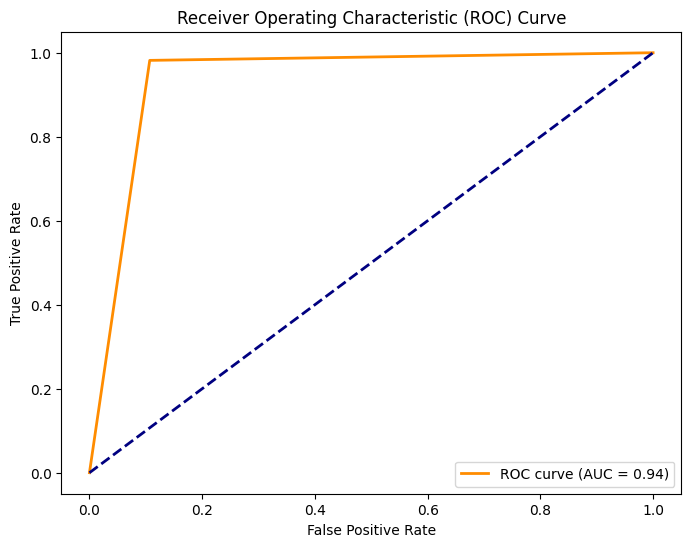

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, auc


y_probs = dt_classifier.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_probs)

fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


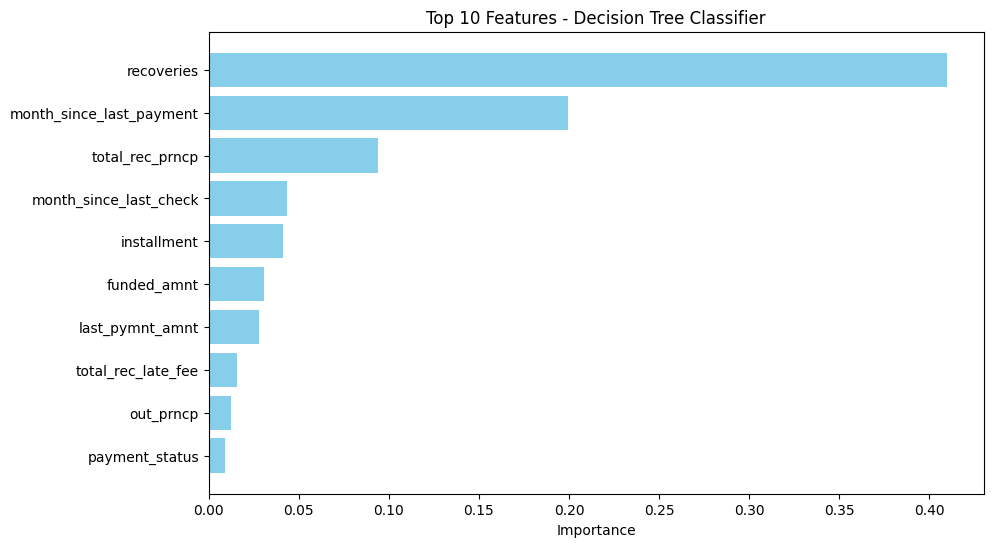

In [ ]:
# Get feature importances and feature names
importances = dt_classifier.feature_importances_
feature_names = X_train.columns

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})

# Sort the DataFrame by Importance in descending order
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Select the top 10 features
top_features = feature_importance_df.head(10)

# Plot the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(top_features["Feature"], top_features["Importance"], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 10 Features - Decision Tree Classifier')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

##Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

logreg_classifier = LogisticRegression(random_state=42)

# Train
logreg_classifier.fit(X_train, y_train)

# predic
y_pred = logreg_classifier.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# results
print("Accuracy on Test Set:", accuracy)
print("Confusion Matrix:",conf_matrix)
print("Classification Report:\n", classification_report_result)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy on Test Set: 0.9695035207491869
Confusion Matrix: [[ 12367   4155]
 [   111 123252]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.75      0.85     16522
         1.0       0.97      1.00      0.98    123363

    accuracy                           0.97    139885
   macro avg       0.98      0.87      0.92    139885
weighted avg       0.97      0.97      0.97    139885



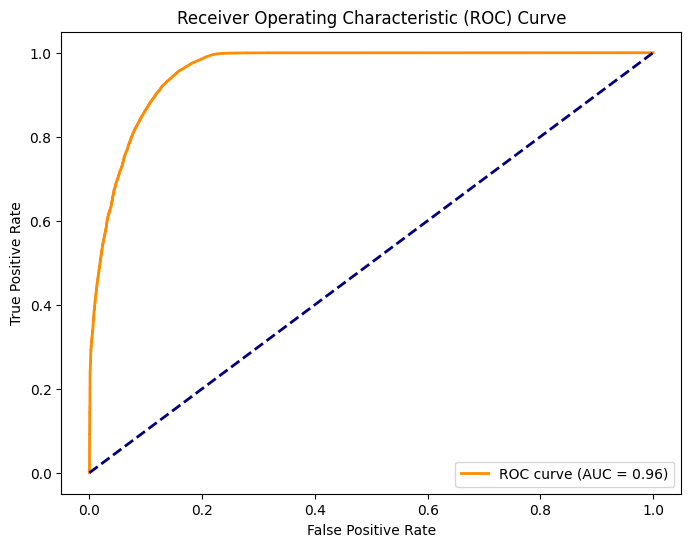

In [ ]:
# Get predicted probabilities for positive class
y_probs = logreg_classifier.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_probs)

fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



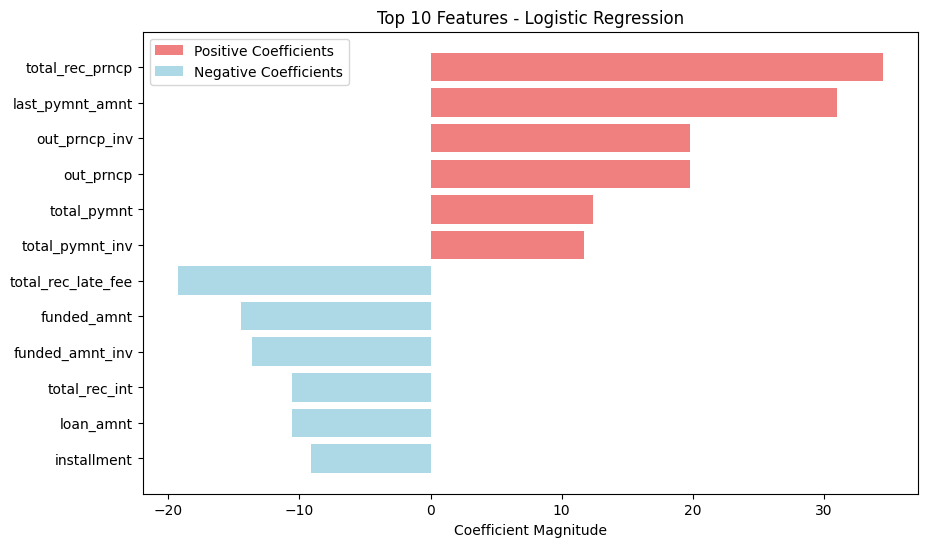

Top 10 Features:
               Feature  Coefficient
31     total_rec_prncp    34.458349
36     last_pymnt_amnt    30.980090
28       out_prncp_inv    19.793766
27           out_prncp    19.771345
33  total_rec_late_fee   -19.239595
1          funded_amnt   -14.452980
2      funded_amnt_inv   -13.589472
29         total_pymnt    12.394815
30     total_pymnt_inv    11.729256
32       total_rec_int   -10.550980
0            loan_amnt   -10.535545
5          installment    -9.071158


In [ ]:
# Get coefficients and feature names
coefficients = logreg_classifier.coef_[0]
feature_names = X_train.columns

# Create a DataFrame to store feature coefficients
feature_coefficient_df = pd.DataFrame({"Feature": feature_names, "Coefficient": coefficients})

# Sort the DataFrame by Coefficient magnitude in descending order
feature_coefficient_df = feature_coefficient_df.reindex(
    feature_coefficient_df["Coefficient"].abs().sort_values(ascending=False).index
)

# Select the top 10 features
top_features = feature_coefficient_df.head(12)

# Plot the top 10 features with positive and negative coefficients
fig, ax = plt.subplots(figsize=(10, 6))

# Plot positive coefficients
ax.barh(top_features[top_features["Coefficient"] > 0]["Feature"],
        top_features[top_features["Coefficient"] > 0]["Coefficient"],
        color='lightcoral', label='Positive Coefficients')

# Plot negative coefficients
ax.barh(top_features[top_features["Coefficient"] < 0]["Feature"],
        top_features[top_features["Coefficient"] < 0]["Coefficient"],
        color='lightblue', label='Negative Coefficients')

ax.set_xlabel('Coefficient Magnitude')
ax.set_title('Top 10 Features - Logistic Regression')
ax.legend()
ax.invert_yaxis()  # Invert y-axis for better visualization

plt.show()

# Display the top 10 features
print("Top 10 Features:")
print(top_features.head(12))

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the Random Forest classifier
rf_classifier.fit(X_train, y_train)

# Make predictions with the trained model
y_pred = rf_classifier.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print("Random Forest Classifier Performance:")
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Random Forest Classifier Performance:
Accuracy: 0.9770

Confusion Matrix:
[[ 13376   3146]
 [    66 123297]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.81      0.89     16522
         1.0       0.98      1.00      0.99    123363

    accuracy                           0.98    139885
   macro avg       0.99      0.90      0.94    139885
weighted avg       0.98      0.98      0.98    139885



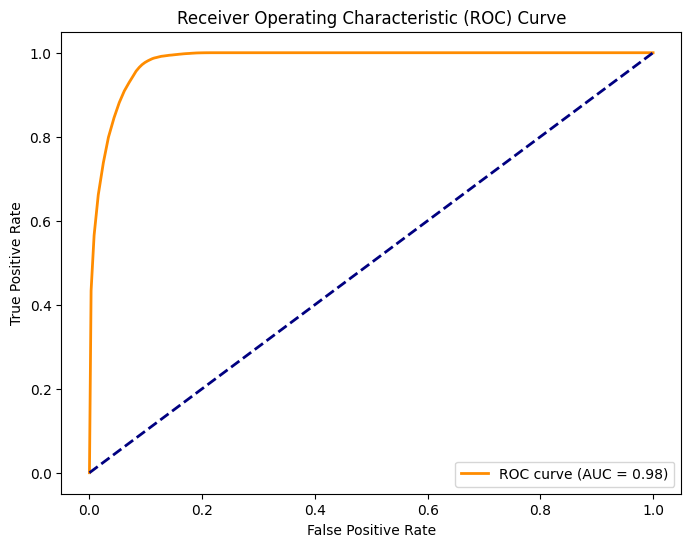

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, auc


y_probs = rf_classifier.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_probs)

fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

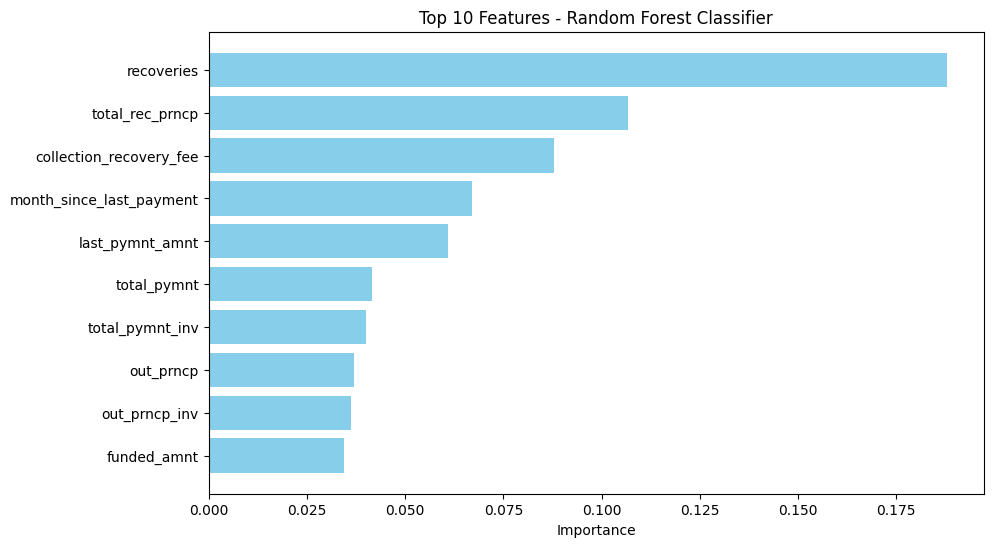

In [ ]:
# Get feature importances and feature names
importances = rf_classifier.feature_importances_
feature_names = X_train.columns

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})

# Sort the DataFrame by Importance in descending order
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Select the top 10 features
top_features = feature_importance_df.head(10)

# Plot the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(top_features["Feature"], top_features["Importance"], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 10 Features - Random Forest Classifier')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

##Tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

#  the model
model = Sequential()

#input layer
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))

#hidden layers
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))

#output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train t
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Make predictions
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

#  results
print("Accuracy on Test Set:", accuracy)
print("Classification Report:\n", classification_report_result)

Epoch 1/10
8160/8160 [==============================] - 20s 2ms/step - loss: 0.1190 - accuracy: 0.9675 - val_loss: 0.1027 - val_accuracy: 0.9725
Epoch 2/10
8160/8160 [==============================] - 19s 2ms/step - loss: 0.1018 - accuracy: 0.9720 - val_loss: 0.0975 - val_accuracy: 0.9730
Epoch 3/10
8160/8160 [==============================] - 22s 3ms/step - loss: 0.0967 - accuracy: 0.9729 - val_loss: 0.1074 - val_accuracy: 0.9721
Epoch 4/10
8160/8160 [==============================] - 18s 2ms/step - loss: 0.0929 - accuracy: 0.9738 - val_loss: 0.0911 - val_accuracy: 0.9740
Epoch 5/10
8160/8160 [==============================] - 18s 2ms/step - loss: 0.0890 - accuracy: 0.9745 - val_loss: 0.0858 - val_accuracy: 0.9749
Epoch 6/10
8160/8160 [==============================] - 22s 3ms/step - loss: 0.0845 - accuracy: 0.9753 - val_loss: 0.0855 - val_accuracy: 0.9765
Epoch 7/10
8160/8160 [==============================] - 20s 2ms/step - loss: 0.0796 - accuracy: 0.9764 - val_loss: 0.0824 - val_ac

4372/4372 [==============================] - 6s 1ms/step


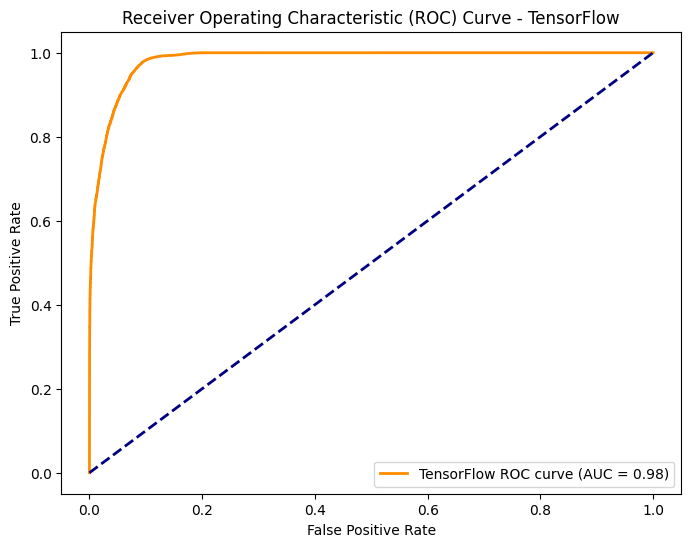

TensorFlow ROC AUC: 0.9832


In [ ]:
# Make predictions
y_probs_tensorflow = model.predict(X_test).ravel()

roc_auc_tensorflow = roc_auc_score(y_test, y_probs_tensorflow)

fpr_tensorflow, tpr_tensorflow, _ = roc_curve(y_test, y_probs_tensorflow)
roc_auc_tensorflow = auc(fpr_tensorflow, tpr_tensorflow)

plt.figure(figsize=(8, 6))
plt.plot(fpr_tensorflow, tpr_tensorflow, color='darkorange', lw=2, label=f'TensorFlow ROC curve (AUC = {roc_auc_tensorflow:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - TensorFlow')
plt.legend(loc="lower right")
plt.show()

print(f"TensorFlow ROC AUC: {roc_auc_tensorflow:.4f}")